In [1]:
from mpmath import mp, mpc, factorial, power, exp, cos, sin, fabs

# Set the desired precision (e.g., 128 bits, ~38 decimal places)
mp.dps = 38


fft_string = \
r"const static __float128 GramFE_FFT[2 * GRAMFE_FLU_NXT * GRAMFE_FLU_NXT] = {\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -6.99290417435684244754669573673030209e-258q, -1.00000000000000000000000000000000000e+00q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -1.00000000000000000000000000000000000e+00q, 1.39858083487136848950933914734606042e-257q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -6.99290417435684244754669573673030209e-258q, -1.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -1.00000000000000000000000000000000000e+00q, 1.39858083487136848950933914734606042e-257q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 1.00000000000000000000000000000000000e+00q, -2.79716166974273697901867829469212084e-257q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -1.66456221690585418856883441631333103e-258q, -1.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 8.22502878753762549509266343137521083e-257q, 1.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -1.62836013533846655482219554100492700e-256q, -1.00000000000000000000000000000000000e+00q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -6.99290417435684244754669573673030209e-258q, -1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 1.39858083487136848950933914734606042e-257q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -2.79716166974273697901867829469212084e-257q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.66456221690585418856883441631333103e-258q, -1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.22502878753762549509266343137521083e-257q, 1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -5.59432333948547395803735658938424167e-257q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -2.96361789143332242098204974739327251e-257q, -1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 3.32912443381170837713766883262666205e-258q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.10221904572803624741113417260673317e-256q, 1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795540642959405467323600e-256q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.76077956117605940000072804208539335e-257q, -1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 1.64500575750752509901853268627504217e-256q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -1.66456221690585418856883441631333103e-258q, -1.00000000000000000000000000000000000e+00q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -1.00000000000000000000000000000000000e+00q, 3.32912443381170837713766883262666205e-258q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -1.62836013533846655482219554100492700e-256q, -1.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795540642959405467323600e-256q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 2.71393355889744396227394602664786725e-256q, 1.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -1.00000000000000000000000000000000000e+00q, 3.25672027067693310964439108200985400e-256q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -6.46350367484669088246281726990304023e-256q, -1.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 8.22502878753762549509266343137521083e-257q, 1.00000000000000000000000000000000000e+00q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -1.00000000000000000000000000000000000e+00q, 1.64500575750752509901853268627504217e-256q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -1.13551029006615333580380846314696350e-256q, -1.00000000000000000000000000000000000e+00q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -6.99290417435684244754669573673030209e-258q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.39858083487136848950933914734606042e-257q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -2.79716166974273697901867829469212084e-257q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.66456221690585418856883441631333103e-258q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.22502878753762549509266343137521083e-257q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -5.59432333948547395803735658938424167e-257q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -2.96361789143332242098204974739327251e-257q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 3.32912443381170837713766883262666205e-258q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.10221904572803624741113417260673317e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795540642959405467323600e-256q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.76077956117605940000072804208539335e-257q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.64500575750752509901853268627504217e-256q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -1.11886466789709479160747131787684833e-256q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -2.18779246928701395062593119994335117e-256q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 5.92723578286664484196409949478654502e-257q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.66165137967658364321486983154515733e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -6.65824886762341675427533766525332410e-258q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.13551029006615333580380846314696350e-256q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 2.20443809145607249482226834521346633e-256q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.27336589284599135807768168558629142e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -4.34229369423591081285918810934647200e-256q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.32281108452927117390905219226484087e-258q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.15215591223521188000014560841707867e-256q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -3.29001151501505019803706537255008433e-256q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -4.35893931640496906129247871292290942e-256q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.16880153440427042419648275368719384e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -2.96361789143332242098204974739327251e-257q, -1.00000000000000000000000000000000000e+00q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -1.00000000000000000000000000000000000e+00q, 5.92723578286664484196409949478654502e-257q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -1.66456221690585418856883441631333103e-258q, -1.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -1.00000000000000000000000000000000000e+00q, 3.32912443381170837713766883262666205e-258q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 1.00000000000000000000000000000000000e+00q, -6.65824886762341675427533766525332410e-258q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -8.32281108452927117390905219226484087e-258q, -1.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 1.16519355183409790889169608034951314e-257q, 1.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 1.10221904572803624741113417260673317e-256q, 1.00000000000000000000000000000000000e+00q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -1.00000000000000000000000000000000000e+00q, 2.20443809145607249482226834521346633e-256q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -3.30665713718410844647035597612652176e-256q, -1.00000000000000000000000000000000000e+00q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.62836013533846655482219554100492700e-256q, -1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795540642959405467323600e-256q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 2.71393355889744396227394602664786725e-256q, 1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 3.25672027067693310964439108200985400e-256q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -6.46350367484669088246281726990304023e-256q, -1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -4.34229369423591081285918810934647200e-256q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 5.42786711779488792454789205329573451e-256q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.63465052196464628889241132457627623e-256q, -1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -6.51344054135386621928878216401970799e-256q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 4.39223056074308614968515300346313976e-256q, 1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 1.29270073496933817649256345398060805e-255q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.08057973690826005122698192124748013e-255q, -1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -5.76077956117605940000072804208539335e-257q, -1.00000000000000000000000000000000000e+00q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -1.00000000000000000000000000000000000e+00q, 1.15215591223521188000014560841707867e-256q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 4.39223056074308614968515300346313976e-256q, 1.00000000000000000000000000000000000e+00q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 8.22502878753762549509266343137521083e-257q, 1.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -1.00000000000000000000000000000000000e+00q, 1.64500575750752509901853268627504217e-256q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -1.13551029006615333580380846314696350e-256q, -1.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 1.00000000000000000000000000000000000e+00q, -3.29001151501505019803706537255008433e-256q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 5.44451273996394676450727574025952742e-256q, 1.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -1.00000000000000000000000000000000000e+00q, 2.27102058013230667160761692629392700e-256q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -4.42552180508120323807782729400337009e-256q, -1.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -6.99290417435684244754669573673030209e-258q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.39858083487136848950933914734606042e-257q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -2.79716166974273697901867829469212084e-257q, -1.66456221690585418856883441631333103e-258q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, 8.22502878753762549509266343137521083e-257q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -5.59432333948547395803735658938424167e-257q, -2.96361789143332242098204974739327251e-257q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 3.32912443381170837713766883262666205e-258q, 1.10221904572803624741113417260673317e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795540642959405467323600e-256q, -5.76077956117605940000072804208539335e-257q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.64500575750752509901853268627504217e-256q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -1.11886466789709479160747131787684833e-256q, -2.18779246928701395062593119994335117e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 5.92723578286664484196409949478654502e-257q, 1.66165137967658364321486983154515733e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -6.65824886762341675427533766525332410e-258q, -1.13551029006615333580380846314696350e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 2.20443809145607249482226834521346633e-256q, 3.27336589284599135807768168558629142e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -4.34229369423591081285918810934647200e-256q, -8.32281108452927117390905219226484087e-258q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.15215591223521188000014560841707867e-256q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -3.29001151501505019803706537255008433e-256q, -4.35893931640496906129247871292290942e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, 1.16880153440427042419648275368719384e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -2.23772933579418958321494263575369667e-256q, -3.30665713718410844647035597612652176e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 4.37558493857402790125186239988670233e-256q, 1.16519355183409790889169608034951314e-257q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -1.18544715657332896839281989895730900e-256q, -2.25437495796324812741127978102381184e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 3.32330275935316728642973966309031467e-256q, 4.39223056074308614968515300346313976e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -1.33164977352468335085506753305066482e-257q, -6.53008616352292505924816585098350091e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 2.27102058013230667160761692629392700e-256q, -1.98804500325831142026988545670196915e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -4.40887618291214498964453669042693267e-256q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 6.54673178569198271615536337117258284e-256q, 2.28766620230136521580395407156404217e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -8.68458738847182162571837621869294399e-256q, -4.42552180508120323807782729400337009e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.66456221690585423478181043845296817e-257q, 6.56337740786104155611474705813637575e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -2.30431182447042376000029121683415734e-256q, -8.70123301064088046567775990565673690e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 4.44216742725026207803721098096716300e-256q, 1.83101843859643986159708597971266844e-257q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -6.58002303003010039607413074510016866e-256q, -2.32095744663948230419662836210427251e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 8.71787863280993812258495742584581884e-256q, 4.45881304941932032647050158454360043e-256q, 1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -1.99747466028702530356045743241382012e-257q, -6.59666865219915923603351443206396158e-256q, -1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 2.33760306880854084839296550737438767e-256q, 8.73452425497899696254434111280961175e-256q, 1.00000000000000000000000000000000000e+00q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -2.18779246928701395062593119994335117e-256q, -1.00000000000000000000000000000000000e+00q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -1.00000000000000000000000000000000000e+00q, 4.37558493857402790125186239988670233e-256q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 6.56337740786104155611474705813637575e-256q, 1.00000000000000000000000000000000000e+00q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -2.96361789143332242098204974739327251e-257q, -1.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -1.00000000000000000000000000000000000e+00q, 5.92723578286664484196409949478654502e-257q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 1.00000000000000000000000000000000000e+00q, -1.18544715657332896839281989895730900e-256q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -1.00000000000000000000000000000000000e+00q, 4.44216742725026207803721098096716300e-256q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -1.92146251458207724348453687562150848e-256q, 1.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 1.66165137967658364321486983154515733e-256q, 1.00000000000000000000000000000000000e+00q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -1.00000000000000000000000000000000000e+00q, 3.32330275935316728642973966309031467e-256q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -2.32095744663948230419662836210427251e-256q, -1.00000000000000000000000000000000000e+00q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.66456221690585418856883441631333103e-258q, -1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 3.32912443381170837713766883262666205e-258q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -6.65824886762341675427533766525332410e-258q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.32281108452927117390905219226484087e-258q, -1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.16519355183409790889169608034951314e-257q, 1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -1.33164977352468335085506753305066482e-257q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 1.66456221690585423478181043845296817e-257q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.83101843859643986159708597971266844e-257q, 1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -1.99747466028702530356045743241382012e-257q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -2.16393088197761074552382888511497179e-257q, -1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 2.33038710366819581778339216069902629e-257q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 2.49684332535878125974676361340017797e-257q, 1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -1.13551029006615333580380846314696350e-256q, -1.00000000000000000000000000000000000e+00q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -1.00000000000000000000000000000000000e+00q, 2.27102058013230667160761692629392700e-256q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 8.73452425497899696254434111280961175e-256q, 1.00000000000000000000000000000000000e+00q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 1.10221904572803624741113417260673317e-256q, 1.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -1.00000000000000000000000000000000000e+00q, 2.20443809145607249482226834521346633e-256q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.30665713718410844647035597612652176e-256q, -1.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 1.00000000000000000000000000000000000e+00q, -4.40887618291214498964453669042693267e-256q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 1.83101843859643986159708597971266844e-257q, 1.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -1.00000000000000000000000000000000000e+00q, 6.61331427436821689294071195225304351e-256q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -1.30435267048767900954847618482284979e-255q, -1.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 3.27336589284599135807768168558629142e-256q, 1.00000000000000000000000000000000000e+00q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -1.00000000000000000000000000000000000e+00q, 6.54673178569198271615536337117258284e-256q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -4.49210429375743741486317587508383076e-256q, -1.00000000000000000000000000000000000e+00q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.62836013533846655482219554100492700e-256q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795540642959405467323600e-256q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 2.71393355889744396227394602664786725e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 3.25672027067693310964439108200985400e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -6.46350367484669088246281726990304023e-256q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -4.34229369423591081285918810934647200e-256q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 5.42786711779488792454789205329573451e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.63465052196464628889241132457627623e-256q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -6.51344054135386621928878216401970799e-256q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 4.39223056074308614968515300346313976e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.29270073496933817649256345398060805e-255q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.08057973690826005122698192124748013e-255q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -8.68458738847182162571837621869294399e-256q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 6.56337740786104155611474705813637575e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 4.44216742725026207803721098096716300e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.29769442162005571017515994339227482e-255q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -1.08557342355897758490957841065914690e-255q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.73452425497899696254434111280961175e-256q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.72693010439292925777848226491525525e-255q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.51480910633185113251290073218212733e-255q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -1.30268810827077324385775643280394160e-255q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.09056711020969535520261213342575587e-255q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 8.78446112148617229937030600692627951e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.73192379104364679146107875432692202e-255q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -2.58540146993867635298512690796121609e-255q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.30768179492149077754035292221560837e-255q, 1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 2.16115947381652010245396384249496025e-255q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.83439798799334881924845706781765824e-256q, -1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -8.32281108452927117390905219226484087e-258q, -1.00000000000000000000000000000000000e+00q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -1.00000000000000000000000000000000000e+00q, 1.66456221690585423478181043845296817e-257q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 2.49684332535878125974676361340017797e-257q, 1.00000000000000000000000000000000000e+00q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -5.76077956117605940000072804208539335e-257q, -1.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -1.00000000000000000000000000000000000e+00q, 1.15215591223521188000014560841707867e-256q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 4.39223056074308614968515300346313976e-256q, 1.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 1.00000000000000000000000000000000000e+00q, -2.30431182447042376000029121683415734e-256q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -2.16393088197761074552382888511497179e-257q, -1.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -1.00000000000000000000000000000000000e+00q, 8.78446112148617229937030600692627951e-256q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.95944438434756459210648030982750088e-256q, 1.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -1.00000000000000000000000000000000000e+00q, 4.44216742725026207803721098096716300e-256q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -6.66325114087539341281886301314442225e-256q, -1.00000000000000000000000000000000000e+00q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.22502878753762549509266343137521083e-257q, 1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 1.64500575750752509901853268627504217e-256q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.13551029006615333580380846314696350e-256q, -1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -3.29001151501505019803706537255008433e-256q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.44451273996394676450727574025952742e-256q, 1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 2.27102058013230667160761692629392700e-256q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -4.42552180508120323807782729400337009e-256q, -1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -6.58002303003010039607413074510016866e-256q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.73452425497899696254434111280961175e-256q, 1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 1.08890254799278935290145514805190548e-255q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.30435267048767900954847618482284979e-255q, -1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -4.54204116026461334321523385258785401e-256q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.73525291547745855945295549171968060e-255q, 1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 8.85104361016240647615565458800674018e-256q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -2.16615316046723763613656033190662703e-255q, -1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -4.35893931640496906129247871292290942e-256q, -1.00000000000000000000000000000000000e+00q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -1.00000000000000000000000000000000000e+00q, 8.71787863280993812258495742584581884e-256q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 1.30768179492149077754035292221560837e-255q, 1.00000000000000000000000000000000000e+00q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 1.00000000000000000000000000000000000e+00q, -1.99747466028702530356045743241382012e-257q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 2.49684332535878125974676361340017797e-257q, 1.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -1.00000000000000000000000000000000000e+00q, 2.99621199043053758563687797150363299e-257q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.49558065550229428123080050672418520e-257q, -1.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 1.16880153440427042419648275368719384e-256q, 1.00000000000000000000000000000000000e+00q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -1.00000000000000000000000000000000000e+00q, 2.33760306880854084839296550737438767e-256q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -8.83439798799334881924845706781765824e-256q, -1.00000000000000000000000000000000000e+00q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.39858083487136848950933914734606042e-257q, 1.00000000000000000000000000000000000e+00q, -2.79716166974273697901867829469212084e-257q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, 1.00000000000000000000000000000000000e+00q, -5.59432333948547395803735658938424167e-257q, -1.00000000000000000000000000000000000e+00q, 3.32912443381170837713766883262666205e-258q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795540642959405467323600e-256q, -1.00000000000000000000000000000000000e+00q, 1.64500575750752509901853268627504217e-256q, 1.00000000000000000000000000000000000e+00q, -1.11886466789709479160747131787684833e-256q, -1.00000000000000000000000000000000000e+00q, 5.92723578286664484196409949478654502e-257q, 1.00000000000000000000000000000000000e+00q, -6.65824886762341675427533766525332410e-258q, -1.00000000000000000000000000000000000e+00q, 2.20443809145607249482226834521346633e-256q, 1.00000000000000000000000000000000000e+00q, -4.34229369423591081285918810934647200e-256q, -1.00000000000000000000000000000000000e+00q, 1.15215591223521188000014560841707867e-256q, 1.00000000000000000000000000000000000e+00q, -3.29001151501505019803706537255008433e-256q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, 1.00000000000000000000000000000000000e+00q, -2.23772933579418958321494263575369667e-256q, -1.00000000000000000000000000000000000e+00q, 4.37558493857402790125186239988670233e-256q, 1.00000000000000000000000000000000000e+00q, -1.18544715657332896839281989895730900e-256q, -1.00000000000000000000000000000000000e+00q, 3.32330275935316728642973966309031467e-256q, 1.00000000000000000000000000000000000e+00q, -1.33164977352468335085506753305066482e-257q, -1.00000000000000000000000000000000000e+00q, 2.27102058013230667160761692629392700e-256q, 1.00000000000000000000000000000000000e+00q, -4.40887618291214498964453669042693267e-256q, -1.00000000000000000000000000000000000e+00q, 6.54673178569198271615536337117258284e-256q, 1.00000000000000000000000000000000000e+00q, -8.68458738847182162571837621869294399e-256q, -1.00000000000000000000000000000000000e+00q, 1.66456221690585423478181043845296817e-257q, 1.00000000000000000000000000000000000e+00q, -2.30431182447042376000029121683415734e-256q, -1.00000000000000000000000000000000000e+00q, 4.44216742725026207803721098096716300e-256q, 1.00000000000000000000000000000000000e+00q, -6.58002303003010039607413074510016866e-256q, -1.00000000000000000000000000000000000e+00q, 8.71787863280993812258495742584581884e-256q, 1.00000000000000000000000000000000000e+00q, -1.99747466028702530356045743241382012e-257q, -1.00000000000000000000000000000000000e+00q, 2.33760306880854084839296550737438767e-256q, 1.00000000000000000000000000000000000e+00q, -4.47545867158837916642988527150739334e-256q, -1.00000000000000000000000000000000000e+00q, 6.61331427436821689294071195225304351e-256q, 1.00000000000000000000000000000000000e+00q, -8.75116987714805580250372479977340466e-256q, -1.00000000000000000000000000000000000e+00q, 2.33038710366819581778339216069902629e-257q, 1.00000000000000000000000000000000000e+00q, -2.37089431314665793678563979791461801e-256q, -1.00000000000000000000000000000000000e+00q, 4.50874991592649625482255956204762367e-256q, 1.00000000000000000000000000000000000e+00q, -6.64660551870633457285947932618062934e-256q, -1.00000000000000000000000000000000000e+00q, 8.78446112148617229937030600692627951e-256q, 1.00000000000000000000000000000000000e+00q, -2.66329954704936670171013506610132964e-257q, -1.00000000000000000000000000000000000e+00q, 1.30601723270458501184963317019670018e-255q, 1.00000000000000000000000000000000000e+00q, -4.54204116026461334321523385258785401e-256q, -1.00000000000000000000000000000000000e+00q, -3.97609000651662284053977091340393831e-256q, 1.00000000000000000000000000000000000e+00q, -8.81775236582428997928907338085386533e-256q, -1.00000000000000000000000000000000000e+00q, 2.99621199043053758563687797150363299e-257q, 1.00000000000000000000000000000000000e+00q, -1.30934635713839654323107267423451657e-255q, -1.00000000000000000000000000000000000e+00q, 4.57533240460273043160790814312808434e-256q, 1.00000000000000000000000000000000000e+00q, -1.73691747769436432514367524373858880e-255q, -1.00000000000000000000000000000000000e+00q, 8.85104361016240647615565458800674018e-256q, 1.00000000000000000000000000000000000e+00q, -3.32912443381170846956362087690593635e-257q, -1.00000000000000000000000000000000000e+00q, 1.31267548157220831122294941162727515e-255q, 1.00000000000000000000000000000000000e+00q, -4.60862364894084752000058243366831468e-256q, -1.00000000000000000000000000000000000e+00q, 1.74024660212817609313555198113134738e-255q, 1.00000000000000000000000000000000000e+00q, -8.88433485450052415607442196193432600e-256q, -1.00000000000000000000000000000000000e+00q, 3.66203687719287972319417195942533688e-257q, 1.00000000000000000000000000000000000e+00q, -1.31600460600602007921482614902003373e-255q, -1.00000000000000000000000000000000000e+00q, 4.64191489327896460839325672420854501e-256q, 1.00000000000000000000000000000000000e+00q, -1.74357572656198762451699148516916377e-255q, -1.00000000000000000000000000000000000e+00q, 8.91762609883864065294100316908720085e-256q, 1.00000000000000000000000000000000000e+00q, -3.99494932057405060712091486482764023e-257q, -1.00000000000000000000000000000000000e+00q, 1.31933373043983184720670288641279232e-255q, 1.00000000000000000000000000000000000e+00q, -4.67520613761708169678593101474877535e-256q, -1.00000000000000000000000000000000000e+00q, 1.74690485099579939250886822256192235e-255q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -3.30665713718410844647035597612652176e-256q, -1.00000000000000000000000000000000000e+00q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -1.00000000000000000000000000000000000e+00q, 6.61331427436821689294071195225304351e-256q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 4.59197802677178868004119874670452177e-256q, 1.00000000000000000000000000000000000e+00q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -2.18779246928701395062593119994335117e-256q, -1.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -1.00000000000000000000000000000000000e+00q, 4.37558493857402790125186239988670233e-256q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 6.56337740786104155611474705813637575e-256q, 1.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 1.00000000000000000000000000000000000e+00q, -8.75116987714805580250372479977340466e-256q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -2.15949491159961457337368132383099425e-255q, -1.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -1.00000000000000000000000000000000000e+00q, 1.31267548157220831122294941162727515e-255q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 4.65856051544802285682654732778498244e-256q, 1.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 1.16519355183409790889169608034951314e-257q, 1.00000000000000000000000000000000000e+00q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -1.00000000000000000000000000000000000e+00q, 2.33038710366819581778339216069902629e-257q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -3.49558065550229428123080050672418520e-257q, -1.00000000000000000000000000000000000e+00q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -2.96361789143332242098204974739327251e-257q, -1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 5.92723578286664484196409949478654502e-257q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -1.18544715657332896839281989895730900e-256q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 4.44216742725026207803721098096716300e-256q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.92146251458207724348453687562150848e-256q, 1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -2.37089431314665793678563979791461801e-256q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -6.66325114087539341281886301314442225e-256q, -1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 2.99621199043053758563687797150363299e-257q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 4.59197802677178868004119874670452177e-256q, 1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -8.88433485450052415607442196193432600e-256q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.31766916822292584490554590103894193e-255q, -1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, -3.84292502916415448696907375124301697e-256q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 4.49431798564580619360341286869690090e-257q, 1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -2.25437495796324812741127978102381184e-256q, -1.00000000000000000000000000000000000e+00q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -1.00000000000000000000000000000000000e+00q, 4.50874991592649625482255956204762367e-256q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -3.89286189567133041532113172874704021e-256q, 1.00000000000000000000000000000000000e+00q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 1.66165137967658364321486983154515733e-256q, 1.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -1.00000000000000000000000000000000000e+00q, 3.32330275935316728642973966309031467e-256q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -2.32095744663948230419662836210427251e-256q, -1.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 1.00000000000000000000000000000000000e+00q, -6.64660551870633457285947932618062934e-256q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.16266821212112302760024942420478467e-257q, 1.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -1.00000000000000000000000000000000000e+00q, 4.64191489327896460839325672420854501e-256q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -8.96756296534581717281915422997857959e-256q, -1.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 4.39223056074308614968515300346313976e-256q, 1.00000000000000000000000000000000000e+00q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -1.00000000000000000000000000000000000e+00q, 8.78446112148617229937030600692627951e-256q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -1.31766916822292584490554590103894193e-255q, -1.00000000000000000000000000000000000e+00q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.66456221690585418856883441631333103e-258q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 3.32912443381170837713766883262666205e-258q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -6.65824886762341675427533766525332410e-258q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.32281108452927117390905219226484087e-258q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.16519355183409790889169608034951314e-257q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -1.33164977352468335085506753305066482e-257q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.66456221690585423478181043845296817e-257q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.83101843859643986159708597971266844e-257q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -1.99747466028702530356045743241382012e-257q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -2.16393088197761074552382888511497179e-257q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 2.33038710366819581778339216069902629e-257q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 2.49684332535878125974676361340017797e-257q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -2.66329954704936670171013506610132964e-257q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -2.82975576873995214367350651880248132e-257q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 2.99621199043053758563687797150363299e-257q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.16266821212112302760024942420478467e-257q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -3.32912443381170846956362087690593635e-257q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.49558065550229428123080050672418520e-257q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 3.66203687719287972319417195942533688e-257q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82849309888346516515754341212648855e-257q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -3.99494932057405060712091486482764023e-257q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -4.16140554226463604908428631752879191e-257q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 4.32786176395522149104765777022994358e-257q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 4.49431798564580619360341286869690090e-257q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -4.66077420733639163556678432139805258e-257q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -4.82723042902697707753015577409920425e-257q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 4.99368665071756251949352722680035593e-257q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.16014287240814796145689867950150761e-257q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -6.53008616352292505924816585098350091e-256q, -1.00000000000000000000000000000000000e+00q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -1.00000000000000000000000000000000000e+00q, 1.30601723270458501184963317019670018e-255q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 3.02462452601298473134320497495258787e-255q, 1.00000000000000000000000000000000000e+00q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -1.13551029006615333580380846314696350e-256q, -1.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -1.00000000000000000000000000000000000e+00q, 2.27102058013230667160761692629392700e-256q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 8.73452425497899696254434111280961175e-256q, 1.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 1.00000000000000000000000000000000000e+00q, -4.54204116026461334321523385258785401e-256q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.49558065550229428123080050672418520e-257q, -1.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -1.00000000000000000000000000000000000e+00q, 1.74690485099579939250886822256192235e-255q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 1.32765654152436114888117611321721767e-255q, 1.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -1.98804500325831142026988545670196915e-256q, 1.00000000000000000000000000000000000e+00q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -1.00000000000000000000000000000000000e+00q, -3.97609000651662284053977091340393831e-256q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -4.69185175978613994521922161832521277e-256q, -1.00000000000000000000000000000000000e+00q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.10221904572803624741113417260673317e-256q, 1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 2.20443809145607249482226834521346633e-256q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -3.30665713718410844647035597612652176e-256q, -1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -4.40887618291214498964453669042693267e-256q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.83101843859643986159708597971266844e-257q, 1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 6.61331427436821689294071195225304351e-256q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.30435267048767900954847618482284979e-255q, -1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -8.81775236582428997928907338085386533e-256q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 4.59197802677178868004119874670452177e-256q, 1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 3.66203687719287972319417195942533688e-257q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.74524028877889362681814847054301416e-255q, -1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -1.32266285487364337858814239045060870e-255q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.00085420968393366968573543713145443e-256q, 1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 2.60870534097535801909695236964569959e-255q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -2.18612790707010824408782075626317852e-255q, -1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -1.00000000000000000000000000000000000e+00q, 2.99621199043053758563687797150363299e-257q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 4.49431798564580619360341286869690090e-257q, 1.00000000000000000000000000000000000e+00q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.27336589284599135807768168558629142e-256q, 1.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -1.00000000000000000000000000000000000e+00q, 6.54673178569198271615536337117258284e-256q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -4.49210429375743741486317587508383076e-256q, -1.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 1.00000000000000000000000000000000000e+00q, -1.30934635713839654323107267423451657e-255q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 2.16948228490104964073887430265432780e-255q, 1.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -1.00000000000000000000000000000000000e+00q, 8.98420858751487482972635175016766152e-256q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -1.75855678651414046217521818675910629e-255q, -1.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 2.28766620230136521580395407156404217e-256q, 1.00000000000000000000000000000000000e+00q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -1.00000000000000000000000000000000000e+00q, 4.57533240460273043160790814312808434e-256q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 3.79298816265697915014310885712634921e-256q, -1.00000000000000000000000000000000000e+00q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 5.42786711779488851607398513668309000e-257q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.08557342355897770321479702733661800e-256q, -1.62836013533846655482219554100492700e-256q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795540642959405467323600e-256q, 2.71393355889744396227394602664786725e-256q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 3.25672027067693310964439108200985400e-256q, -6.46350367484669088246281726990304023e-256q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -4.34229369423591081285918810934647200e-256q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 5.42786711779488792454789205329573451e-256q, -8.63465052196464628889241132457627623e-256q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -6.51344054135386621928878216401970799e-256q, 4.39223056074308614968515300346313976e-256q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.29270073496933817649256345398060805e-255q, -1.08057973690826005122698192124748013e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -8.68458738847182162571837621869294399e-256q, 6.56337740786104155611474705813637575e-256q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 4.44216742725026207803721098096716300e-256q, -1.29769442162005571017515994339227482e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -1.08557342355897758490957841065914690e-255q, 8.73452425497899696254434111280961175e-256q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.72693010439292925777848226491525525e-255q, -1.51480910633185113251290073218212733e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -1.30268810827077324385775643280394160e-255q, 1.09056711020969535520261213342575587e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 8.78446112148617229937030600692627951e-256q, -1.73192379104364679146107875432692202e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -2.58540146993867635298512690796121609e-255q, 1.30768179492149077754035292221560837e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 2.16115947381652010245396384249496025e-255q, -8.83439798799334881924845706781765824e-256q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -1.73691747769436432514367524373858880e-255q, 2.59039515658939388666772339737288287e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.31267548157220831122294941162727515e-255q, -2.16615316046723763613656033190662703e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -8.88433485450052415607442196193432600e-256q, 1.74191116434508185882627173315025557e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 2.59538884324011142035031988678454965e-255q, -1.31766916822292584490554590103894193e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -2.17114684711795516981915682131829380e-255q, 3.02462452601298473134320497495258787e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.74690485099579939250886822256192235e-255q, -2.60038252989082895403291637619621642e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -3.45386020878585851555696452983051049e-255q, 2.17614053376867317672262777743984497e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 3.02961821266370226502580146436425465e-255q, -1.75189853764651692619146471197358913e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -2.60537621654154648771551286560788320e-255q, 3.45885389543657604923956101924217727e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 2.18113422041939071040522426685151174e-255q, -3.03461189931441979870839795377592143e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -1.75689222429723445987406120138525590e-255q, 2.61036990319226402139810935501954997e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 3.46384758208729358292215750865384405e-255q, -2.18612790707010824408782075626317852e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -5.17080293987735270597025381592243219e-255q, 3.89308326486016689391504259682188227e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 2.61536358984298155508070584443121675e-255q, -1.33764391482579621624636909204055123e-255q, -1.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, -4.32231894763304020490792768498992050e-255q, 3.04459927261585533929446539930913937e-255q, 1.00000000000000000000000000000000000e+00q, -1.00000000000000000000000000000000000e+00q, 1.76687959759866976384969141356353165e-255q, -4.75155463040591398912168723986784312e-255q, -1.00000000000000000000000000000000000e+00q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -4.42552180508120323807782729400337009e-256q, -1.00000000000000000000000000000000000e+00q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -1.00000000000000000000000000000000000e+00q, 8.85104361016240647615565458800674018e-256q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 1.32765654152436114888117611321721767e-255q, 1.00000000000000000000000000000000000e+00q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -8.32281108452927117390905219226484087e-258q, -1.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -1.00000000000000000000000000000000000e+00q, 1.66456221690585423478181043845296817e-257q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 2.49684332535878125974676361340017797e-257q, 1.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 1.00000000000000000000000000000000000e+00q, -3.32912443381170846956362087690593635e-257q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -4.16140554226463604908428631752879191e-257q, -1.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -1.00000000000000000000000000000000000e+00q, 4.99368665071756251949352722680035593e-257q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 2.18945703150391977546926026030099491e-255q, 1.00000000000000000000000000000000000e+00q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 6.56337740786104155611474705813637575e-256q, 1.00000000000000000000000000000000000e+00q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -1.00000000000000000000000000000000000e+00q, 1.31267548157220831122294941162727515e-255q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -3.03461189931441979870839795377592143e-255q, -1.00000000000000000000000000000000000e+00q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.76077956117605940000072804208539335e-257q, -1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 1.15215591223521188000014560841707867e-256q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 4.39223056074308614968515300346313976e-256q, 1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -2.30431182447042376000029121683415734e-256q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -2.16393088197761074552382888511497179e-257q, -1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 8.78446112148617229937030600692627951e-256q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -3.95944438434756459210648030982750088e-256q, 1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -4.60862364894084752000058243366831468e-256q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.31766916822292584490554590103894193e-255q, -1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, 4.32786176395522149104765777022994358e-257q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.00085420968393366968573543713145443e-256q, 1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.00000000000000000000000000000000000e+00q, -1.75689222429723445987406120138525590e-255q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -4.82501673713860829878991878048613411e-256q, -1.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.00000000000000000000000000000000000e+00q, -7.91888876869512918421296061965500177e-256q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 2.19611528037154331145301373508651207e-255q, 1.00000000000000000000000000000000000e+00q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -8.70123301064088046567775990565673690e-256q, -1.00000000000000000000000000000000000e+00q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -1.00000000000000000000000000000000000e+00q, 1.74024660212817609313555198113134738e-255q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 2.61036990319226402139810935501954997e-255q, 1.00000000000000000000000000000000000e+00q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 2.22108371362513103901860549048358150e-256q, 1.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -1.00000000000000000000000000000000000e+00q, 4.44216742725026207803721098096716300e-256q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -6.66325114087539341281886301314442225e-256q, -1.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 1.00000000000000000000000000000000000e+00q, -8.88433485450052415607442196193432600e-256q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 2.17614053376867317672262777743984497e-255q, 1.00000000000000000000000000000000000e+00q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -1.00000000000000000000000000000000000e+00q, 1.33265022817507868256377260262888445e-255q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -4.89159922581484247557526736156659478e-256q, -1.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 1.83101843859643986159708597971266844e-257q, 1.00000000000000000000000000000000000e+00q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -1.00000000000000000000000000000000000e+00q, 3.66203687719287972319417195942533688e-257q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 2.07626680075432179323938628914168287e-255q, -1.00000000000000000000000000000000000e+00q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.22502878753762549509266343137521083e-257q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.64500575750752509901853268627504217e-256q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.13551029006615333580380846314696350e-256q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -3.29001151501505019803706537255008433e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.44451273996394676450727574025952742e-256q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 2.27102058013230667160761692629392700e-256q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -4.42552180508120323807782729400337009e-256q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -6.58002303003010039607413074510016866e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 8.73452425497899696254434111280961175e-256q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.08890254799278935290145514805190548e-255q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.30435267048767900954847618482284979e-255q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -4.54204116026461334321523385258785401e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.73525291547745855945295549171968060e-255q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 8.85104361016240647615565458800674018e-256q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -2.16615316046723763613656033190662703e-255q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -1.31600460600602007921482614902003373e-255q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 4.65856051544802285682654732778498244e-256q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 1.74690485099579939250886822256192235e-255q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -8.96756296534581717281915422997857959e-256q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -2.17780509598557870580291029610381097e-255q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.32765654152436114888117611321721767e-255q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 2.60870534097535801909695236964569959e-255q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.75855678651414046217521818675910629e-255q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -9.08408232052922668643046770517570802e-256q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 2.18945703150391977546926026030099491e-255q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 3.47050583095491711890591098343936121e-255q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -4.89159922581484247557526736156659478e-256q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 1.00000000000000000000000000000000000e+00q, -1.77020872203248129523113091760134804e-255q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.05125752148347840205734440738477214e-255q, 1.00000000000000000000000000000000000e+00q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -1.00000000000000000000000000000000000e+00q, 4.33230632093447527227312066381325406e-255q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.35096041256104305160343880825664336e-255q, -1.00000000000000000000000000000000000e+00q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -2.32095744663948230419662836210427251e-256q, -1.00000000000000000000000000000000000e+00q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -1.00000000000000000000000000000000000e+00q, 4.64191489327896460839325672420854501e-256q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -3.69311442964262788496508598550565820e-256q, 1.00000000000000000000000000000000000e+00q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -4.35893931640496906129247871292290942e-256q, -1.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -1.00000000000000000000000000000000000e+00q, 8.71787863280993812258495742584581884e-256q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 1.30768179492149077754035292221560837e-255q, 1.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 1.00000000000000000000000000000000000e+00q, -1.74357572656198762451699148516916377e-255q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -2.17946965820248470810406728147766136e-255q, -1.00000000000000000000000000000000000e+00q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -1.00000000000000000000000000000000000e+00q, 2.61536358984298155508070584443121675e-255q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.05125752148347840205734440738477214e-255q, 1.00000000000000000000000000000000000e+00q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 4.45881304941932032647050158454360043e-256q, 1.00000000000000000000000000000000000e+00q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -1.00000000000000000000000000000000000e+00q, 8.91762609883864065294100316908720085e-256q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -1.33764391482579621624636909204055123e-255q, -1.00000000000000000000000000000000000e+00q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 4.99368665071756325890114358103455029e-258q, 1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 9.98737330143512651780228716206910058e-258q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.49810599521526879281843898575181650e-257q, -1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -1.99747466028702530356045743241382012e-257q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 2.49684332535878125974676361340017797e-257q, 1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 2.99621199043053758563687797150363299e-257q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -3.49558065550229428123080050672418520e-257q, -1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -3.99494932057405060712091486482764023e-257q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 4.49431798564580619360341286869690090e-257q, 1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 4.99368665071756251949352722680035593e-257q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 2.07626680075432179323938628914168287e-255q, -1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 1.00000000000000000000000000000000000e+00q, -5.99242398086107517127375594300726599e-257q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 2.19611528037154331145301373508651207e-255q, 1.00000000000000000000000000000000000e+00q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -1.00000000000000000000000000000000000e+00q, 6.99116131100458856246160101344837040e-257q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 2.05629205415145142189856309814007357e-255q, -1.00000000000000000000000000000000000e+00q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -6.59666865219915923603351443206396158e-256q, -1.00000000000000000000000000000000000e+00q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -1.00000000000000000000000000000000000e+00q, 1.31933373043983184720670288641279232e-255q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 3.04459927261585533929446539930913937e-255q, 1.00000000000000000000000000000000000e+00q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 1.16880153440427042419648275368719384e-256q, 1.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -1.00000000000000000000000000000000000e+00q, 2.33760306880854084839296550737438767e-256q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -8.83439798799334881924845706781765824e-256q, -1.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 1.00000000000000000000000000000000000e+00q, -4.67520613761708169678593101474877535e-256q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 5.16014287240814796145689867950150761e-257q, 1.00000000000000000000000000000000000e+00q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -1.00000000000000000000000000000000000e+00q, 1.76687959759866976384969141356353165e-255q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -1.35096041256104305160343880825664336e-255q, -1.00000000000000000000000000000000000e+00q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q,\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, 9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, 9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, 9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, 8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, 8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, 7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, 7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, 6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, 5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, 4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, 3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, 2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, 1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, 9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, 8.73452425497899696254434111280961175e-256q, 1.00000000000000000000000000000000000e+00q, -9.80171403295606036287779261328978464e-02q, 9.95184726672196928731750631413888186e-01q, -1.95090322016128275839363936938752886e-01q, 9.80785280403230430579242238309234381e-01q, -2.90284677254462386564171083591645584e-01q, 9.56940335732208824381928025104571134e-01q, -3.82683432365089781779232680491986685e-01q, 9.23879532511286738483136105060111731e-01q, -4.71396736825997642039709489836241119e-01q, 8.81921264348355049556005269550951198e-01q, -5.55570233019602177648721408331766725e-01q, 8.31469612302545235671402679145103320e-01q, -6.34393284163645487794269683945458382e-01q, 7.73010453362736993376813643408240750e-01q, -7.07106781186547572737310929369414225e-01q, 7.07106781186547572737310929369414225e-01q, -7.73010453362736993376813643408240750e-01q, 6.34393284163645487794269683945458382e-01q, -8.31469612302545235671402679145103320e-01q, 5.55570233019602177648721408331766725e-01q, -8.81921264348355049556005269550951198e-01q, 4.71396736825997642039709489836241119e-01q, -9.23879532511286738483136105060111731e-01q, 3.82683432365089781779232680491986685e-01q, -9.56940335732208824381928025104571134e-01q, 2.90284677254462386564171083591645584e-01q, -9.80785280403230430579242238309234381e-01q, 1.95090322016128275839363936938752886e-01q, -9.95184726672196928731750631413888186e-01q, 9.80171403295606036287779261328978464e-02q, -1.00000000000000000000000000000000000e+00q, 1.74690485099579939250886822256192235e-255q, -9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q, -9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, -9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, -9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, -8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, -8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, -7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, -7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, -6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, -5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, -4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, -3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, -2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, -1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, -9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, -4.75155463040591398912168723986784312e-255q, -1.00000000000000000000000000000000000e+00q, 9.80171403295606036287779261328978464e-02q, -9.95184726672196928731750631413888186e-01q, 1.95090322016128275839363936938752886e-01q, -9.80785280403230430579242238309234381e-01q, 2.90284677254462386564171083591645584e-01q, -9.56940335732208824381928025104571134e-01q, 3.82683432365089781779232680491986685e-01q, -9.23879532511286738483136105060111731e-01q, 4.71396736825997642039709489836241119e-01q, -8.81921264348355049556005269550951198e-01q, 5.55570233019602177648721408331766725e-01q, -8.31469612302545235671402679145103320e-01q, 6.34393284163645487794269683945458382e-01q, -7.73010453362736993376813643408240750e-01q, 7.07106781186547572737310929369414225e-01q, -7.07106781186547572737310929369414225e-01q, 7.73010453362736993376813643408240750e-01q, -6.34393284163645487794269683945458382e-01q, 8.31469612302545235671402679145103320e-01q, -5.55570233019602177648721408331766725e-01q, 8.81921264348355049556005269550951198e-01q, -4.71396736825997642039709489836241119e-01q, 9.23879532511286738483136105060111731e-01q, -3.82683432365089781779232680491986685e-01q, 9.56940335732208824381928025104571134e-01q, -2.90284677254462386564171083591645584e-01q, 9.80785280403230430579242238309234381e-01q, -1.95090322016128275839363936938752886e-01q, 9.95184726672196928731750631413888186e-01q, -9.80171403295606036287779261328978464e-02q,\
};"

ifft_string = \
r"\
const static __float128 GramFE_IFFT[2 * PS2 * GRAMFE_FLU_NXT] = {\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.09264127724325663242917120886410970e-259q, 1.56250000000000000000000000000000000e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.56250000000000000000000000000000000e-02q, -2.18528255448651326485834241772821940e-259q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 8.48104237155451330636560177606732812e-259q, -1.56250000000000000000000000000000000e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.56250000000000000000000000000000000e-02q, 4.37056510897302652971668483545643881e-259q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -2.60087846391539716963880377548957973e-260q, 1.56250000000000000000000000000000000e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.56250000000000000000000000000000000e-02q, -1.69620847431090266127312035521346562e-258q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.28516074805275398360822866115237669e-258q, -1.56250000000000000000000000000000000e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.56250000000000000000000000000000000e-02q, 8.74113021794605305943336967091287761e-259q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -4.63065295536456628278445273030198830e-259q, 1.56250000000000000000000000000000000e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.56250000000000000000000000000000000e-02q, -5.20175692783079433927760755097915946e-260q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.72221725895005663657989714469802057e-258q, -1.56250000000000000000000000000000000e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.56250000000000000000000000000000000e-02q, 3.39241694862180532254624071042693125e-258q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -9.00121806433759281250113756575842711e-259q, 1.56250000000000000000000000000000000e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.56250000000000000000000000000000000e-02q, -2.57032149610550796721645732230475338e-258q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 7.80263539174619259203303684536648483e-260q, -1.56250000000000000000000000000000000e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.56250000000000000000000000000000000e-02q, 1.74822604358921061188667393418257552e-258q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -3.41842573326095929785301749991148620e-258q, 1.56250000000000000000000000000000000e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.56250000000000000000000000000000000e-02q, -9.26130591072913256556890546060397660e-259q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 2.59633028074466194252323411178930833e-258q, -1.56250000000000000000000000000000000e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.56250000000000000000000000000000000e-02q, 1.04035138556615886785552151019583189e-259q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.77423482822836458719345072366713047e-258q, 1.56250000000000000000000000000000000e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.56250000000000000000000000000000000e-02q, -3.44443451790011327315979428939604115e-258q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.11463420757186149699637763372858035e-258q, -1.56250000000000000000000000000000000e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.56250000000000000000000000000000000e-02q, 6.78483389724361064509248142085386249e-258q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.30043923195769862092328940504138139e-259q, 1.56250000000000000000000000000000000e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.56250000000000000000000000000000000e-02q, -1.80024361286751856250022751315168542e-258q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 3.47044330253926724846657107888059610e-258q, -1.56250000000000000000000000000000000e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.56250000000000000000000000000000000e-02q, 5.14064299221101593443291464460950677e-258q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -6.81084268188276415826949798894204597e-258q, 1.56250000000000000000000000000000000e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.56250000000000000000000000000000000e-02q, -1.56052707834923851840660736907329697e-259q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.82625239750667253780700430263624037e-258q, -1.56250000000000000000000000000000000e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, 9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -4.63065295536456628278445273030198830e-259q, 1.56250000000000000000000000000000000e-02q, -1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, 1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.56250000000000000000000000000000000e-02q, -9.26130591072913256556890546060397660e-259q, -9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 3.47044330253926724846657107888059610e-258q, -1.56250000000000000000000000000000000e-02q, 1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, -1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -2.60087846391539716963880377548957973e-260q, 1.56250000000000000000000000000000000e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.56250000000000000000000000000000000e-02q, -5.20175692783079433927760755097915946e-260q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 7.80263539174619259203303684536648483e-260q, -1.56250000000000000000000000000000000e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.56250000000000000000000000000000000e-02q, 1.04035138556615886785552151019583189e-259q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.30043923195769862092328940504138139e-259q, 1.56250000000000000000000000000000000e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.56250000000000000000000000000000000e-02q, -1.56052707834923851840660736907329697e-259q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.82061492474077798264327512554611429e-259q, -1.56250000000000000000000000000000000e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, 7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 1.72221725895005663657989714469802057e-258q, -1.56250000000000000000000000000000000e-02q, 1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.56250000000000000000000000000000000e-02q, -3.44443451790011327315979428939604115e-258q, -7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -5.16665177685016944760993121269769025e-258q, 1.56250000000000000000000000000000000e-02q, -1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 8.48104237155451330636560177606732812e-259q, -1.56250000000000000000000000000000000e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.56250000000000000000000000000000000e-02q, -1.69620847431090266127312035521346562e-258q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -2.54431271146635399190968053282019844e-258q, 1.56250000000000000000000000000000000e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.56250000000000000000000000000000000e-02q, 3.39241694862180532254624071042693125e-258q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 4.24052118577725619105304066663729259e-258q, -1.56250000000000000000000000000000000e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.56250000000000000000000000000000000e-02q, -5.08862542293270798381936106564039687e-258q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.00992244919479545038481519842235004e-257q, 1.56250000000000000000000000000000000e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.56250000000000000000000000000000000e-02q, 6.78483389724361064509248142085386249e-258q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 3.47044330253926724846657107888059610e-258q, -1.56250000000000000000000000000000000e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.56250000000000000000000000000000000e-02q, -8.48104237155451238210608133327458517e-258q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.34916414405697598263943926946504316e-257q, 1.56250000000000000000000000000000000e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.56250000000000000000000000000000000e-02q, 1.01772508458654159676387221312807937e-257q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 6.86286025116107210888305156791115587e-258q, -1.56250000000000000000000000000000000e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.56250000000000000000000000000000000e-02q, -2.01984489838959090076963039684470007e-257q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.68840583891915633004215925194918770e-257q, 1.56250000000000000000000000000000000e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, 4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -9.00121806433759281250113756575842711e-259q, 1.56250000000000000000000000000000000e-02q, -1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.56250000000000000000000000000000000e-02q, -1.80024361286751856250022751315168542e-258q, -4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 6.86286025116107210888305156791115587e-258q, -1.56250000000000000000000000000000000e-02q, 1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.28516074805275398360822866115237669e-258q, -1.56250000000000000000000000000000000e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.56250000000000000000000000000000000e-02q, -2.57032149610550796721645732230475338e-258q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.77423482822836458719345072366713047e-258q, 1.56250000000000000000000000000000000e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.56250000000000000000000000000000000e-02q, 5.14064299221101593443291464460950677e-258q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 8.50705115619366681954261834415551159e-258q, -1.56250000000000000000000000000000000e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.56250000000000000000000000000000000e-02q, -3.54846965645672917438690144733426094e-258q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -6.91487782043938005949660514688026577e-258q, 1.56250000000000000000000000000000000e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, 1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 7.80263539174619259203303684536648483e-260q, -1.56250000000000000000000000000000000e-02q, 1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.56250000000000000000000000000000000e-02q, -1.56052707834923851840660736907329697e-259q, -1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -2.34079061752385748877881091523721328e-259q, 1.56250000000000000000000000000000000e-02q, -1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, -1.09264127724325663242917120886410970e-259q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -2.18528255448651326485834241772821940e-259q, 8.48104237155451330636560177606732812e-259q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 4.37056510897302652971668483545643881e-259q, -2.60087846391539716963880377548957973e-260q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -1.69620847431090266127312035521346562e-258q, 1.28516074805275398360822866115237669e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 8.74113021794605305943336967091287761e-259q, -4.63065295536456628278445273030198830e-259q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -5.20175692783079433927760755097915946e-260q, 1.72221725895005663657989714469802057e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 3.39241694862180532254624071042693125e-258q, -9.00121806433759281250113756575842711e-259q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -2.57032149610550796721645732230475338e-258q, 7.80263539174619259203303684536648483e-260q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 1.74822604358921061188667393418257552e-258q, -3.41842573326095929785301749991148620e-258q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -9.26130591072913256556890546060397660e-259q, 2.59633028074466194252323411178930833e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 1.04035138556615886785552151019583189e-259q, -1.77423482822836458719345072366713047e-258q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -3.44443451790011327315979428939604115e-258q, 5.11463420757186149699637763372858035e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 6.78483389724361064509248142085386249e-258q, -1.30043923195769862092328940504138139e-259q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -1.80024361286751856250022751315168542e-258q, 3.47044330253926724846657107888059610e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 5.14064299221101593443291464460950677e-258q, -6.81084268188276415826949798894204597e-258q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -1.56052707834923851840660736907329697e-259q, 1.82625239750667253780700430263624037e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 3.49645208717842122377334786836515104e-258q, -5.16665177685016944760993121269769025e-258q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -6.83685146652191859570603499982297239e-258q, 1.82061492474077798264327512554611429e-259q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 1.85226118214582651311378109212079532e-258q, -3.52246087181757519908012465784970599e-258q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -5.19266056148932388504646822357861667e-258q, 6.86286025116107210888305156791115587e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 2.08070277113231773571104302039166378e-259q, -1.02032596305045704050752591421617202e-257q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -3.54846965645672917438690144733426094e-258q, -3.10632031759111159417169602609682680e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 6.88886903580022654631958857879208229e-258q, -2.34079061752385748877881091523721328e-259q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -1.02292684151437229939927552674571607e-257q, 3.57447844109588314969367823681881589e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 1.35696677944872212901849628417077250e-257q, -6.91487782043938005949660514688026577e-258q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -2.60087846391539724184657881008276277e-259q, 1.02552771997828774314292922783380871e-257q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 3.60048722573503712500045502630337084e-258q, -1.35956765791263757276214998525886514e-257q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -6.94088660507853449693314215776119219e-258q, 2.86096631030693728374544684330104444e-259q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 1.02812859844220318688658292892190135e-257q, -3.62649601037419110030723181578792579e-258q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -1.36216853637655283165389959778840919e-257q, 6.96689538971768801011015872584937567e-258q, -1.56250000000000000000000000000000000e-02q, 1.56250000000000000000000000000000000e-02q, 3.12105415669847703681321473814659393e-259q, -1.03072947690611863063023663000999400e-257q, 1.56250000000000000000000000000000000e-02q, -1.56250000000000000000000000000000000e-02q, -3.65250479501334507561400860527248074e-258q, 1.36476941484046827539755329887650184e-257q, -1.56250000000000000000000000000000000e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, -1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, -3.41842573326095929785301749991148620e-258q, 1.56250000000000000000000000000000000e-02q, -1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.56250000000000000000000000000000000e-02q, -6.83685146652191859570603499982297239e-258q, 1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, 1.02552771997828774314292922783380871e-257q, -1.56250000000000000000000000000000000e-02q, 1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -4.63065295536456628278445273030198830e-259q, 1.56250000000000000000000000000000000e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.56250000000000000000000000000000000e-02q, -9.26130591072913256556890546060397660e-259q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 3.47044330253926724846657107888059610e-258q, -1.56250000000000000000000000000000000e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.56250000000000000000000000000000000e-02q, 1.85226118214582651311378109212079532e-258q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -2.34079061752385748877881091523721328e-259q, 1.56250000000000000000000000000000000e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.56250000000000000000000000000000000e-02q, -6.94088660507853449693314215776119219e-258q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -3.00228517903449569294458886815860701e-258q, -1.56250000000000000000000000000000000e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, -4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, 2.59633028074466194252323411178930833e-258q, -1.56250000000000000000000000000000000e-02q, 1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.56250000000000000000000000000000000e-02q, -5.19266056148932388504646822357861667e-258q, 4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, -3.62649601037419110030723181578792579e-258q, 1.56250000000000000000000000000000000e-02q, -1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -2.60087846391539716963880377548957973e-260q, 1.56250000000000000000000000000000000e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.56250000000000000000000000000000000e-02q, -5.20175692783079433927760755097915946e-260q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 7.80263539174619259203303684536648483e-260q, -1.56250000000000000000000000000000000e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.56250000000000000000000000000000000e-02q, 1.04035138556615886785552151019583189e-259q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -1.30043923195769862092328940504138139e-259q, 1.56250000000000000000000000000000000e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.56250000000000000000000000000000000e-02q, -1.56052707834923851840660736907329697e-259q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 1.82061492474077798264327512554611429e-259q, -1.56250000000000000000000000000000000e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.56250000000000000000000000000000000e-02q, 2.08070277113231773571104302039166378e-259q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -2.34079061752385748877881091523721328e-259q, 1.56250000000000000000000000000000000e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.56250000000000000000000000000000000e-02q, -2.60087846391539724184657881008276277e-259q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 2.86096631030693728374544684330104444e-259q, -1.56250000000000000000000000000000000e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.56250000000000000000000000000000000e-02q, 3.12105415669847703681321473814659393e-259q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -3.38114200309001678988098263299214342e-259q, 1.56250000000000000000000000000000000e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.56250000000000000000000000000000000e-02q, -3.64122984948155596528655025109222858e-259q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 3.90131769587309571835431814593777807e-259q, -1.56250000000000000000000000000000000e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, -7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, -1.77423482822836458719345072366713047e-258q, 1.56250000000000000000000000000000000e-02q, -1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.56250000000000000000000000000000000e-02q, -3.54846965645672917438690144733426094e-258q, 7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, 1.36476941484046827539755329887650184e-257q, -1.56250000000000000000000000000000000e-02q, 1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, 1.72221725895005663657989714469802057e-258q, -1.56250000000000000000000000000000000e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.56250000000000000000000000000000000e-02q, -3.44443451790011327315979428939604115e-258q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, -5.16665177685016944760993121269769025e-258q, 1.56250000000000000000000000000000000e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.56250000000000000000000000000000000e-02q, 6.88886903580022654631958857879208229e-258q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, 2.86096631030693728374544684330104444e-259q, -1.56250000000000000000000000000000000e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.56250000000000000000000000000000000e-02q, -1.03333035537003388952198624253953805e-257q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, -2.03805104763699845241949403878570280e-257q, 1.56250000000000000000000000000000000e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q,\
1.56250000000000000000000000000000000e-02q, 0.00000000000000000000000000000000000e+00q, -9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, -1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, 4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, 1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, 1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, -5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, -1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, 5.11463420757186149699637763372858035e-258q, -1.56250000000000000000000000000000000e-02q, 1.20782883337927655215127131782537617e-02q, 9.91239506505696074678546381164778722e-03q, -1.53247700063004754778006599735817872e-02q, 3.04828628150200430999006151466801384e-03q, 7.36557401290621315687046077869126748e-03q, -1.37800197554430476493125823367336125e-02q, 5.97942863070452784030051063268729195e-03q, 1.44356176954888552887990016415642458e-02q, -1.49521927458157628809676253922589240e-02q, -4.53569808210097479006517318111946224e-03q, 1.29917126922272693073656668616422394e-02q, -8.68078489093128402576127200518385507e-03q, -1.53151781764938443169965509582652885e-03q, 1.55497613542530770114336036158420029e-02q, -1.10485434560398058240204832713970973e-02q, -1.10485434560398058240204832713970973e-02q, 1.55497613542530770114336036158420029e-02q, -1.53151781764938443169965509582652885e-03q, -8.68078489093128402576127200518385507e-03q, 1.29917126922272693073656668616422394e-02q, -4.53569808210097479006517318111946224e-03q, -1.49521927458157628809676253922589240e-02q, 1.44356176954888552887990016415642458e-02q, 5.97942863070452784030051063268729195e-03q, -1.37800197554430476493125823367336125e-02q, 7.36557401290621315687046077869126748e-03q, 3.04828628150200430999006151466801384e-03q, -1.53247700063004754778006599735817872e-02q, 9.91239506505696074678546381164778722e-03q, 1.20782883337927655215127131782537617e-02q, -1.56250000000000000000000000000000000e-02q, -1.02292684151437229939927552674571607e-257q, 9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q, 3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, 1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, -4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, -1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, -1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, 5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, 1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, -7.01891295899599596072371230481848557e-258q, 1.56250000000000000000000000000000000e-02q, -1.20782883337927655215127131782537617e-02q, -9.91239506505696074678546381164778722e-03q, 1.53247700063004754778006599735817872e-02q, -3.04828628150200430999006151466801384e-03q, -7.36557401290621315687046077869126748e-03q, 1.37800197554430476493125823367336125e-02q, -5.97942863070452784030051063268729195e-03q, -1.44356176954888552887990016415642458e-02q, 1.49521927458157628809676253922589240e-02q, 4.53569808210097479006517318111946224e-03q, -1.29917126922272693073656668616422394e-02q, 8.68078489093128402576127200518385507e-03q, 1.53151781764938443169965509582652885e-03q, -1.55497613542530770114336036158420029e-02q, 1.10485434560398058240204832713970973e-02q, 1.10485434560398058240204832713970973e-02q, -1.55497613542530770114336036158420029e-02q, 1.53151781764938443169965509582652885e-03q, 8.68078489093128402576127200518385507e-03q, -1.29917126922272693073656668616422394e-02q, 4.53569808210097479006517318111946224e-03q, 1.49521927458157628809676253922589240e-02q, -1.44356176954888552887990016415642458e-02q, -5.97942863070452784030051063268729195e-03q, 1.37800197554430476493125823367336125e-02q, -7.36557401290621315687046077869126748e-03q, -3.04828628150200430999006151466801384e-03q, 1.53247700063004754778006599735817872e-02q, -9.91239506505696074678546381164778722e-03q, -1.20782883337927655215127131782537617e-02q,\
};"

extend_string = \
r"const static __float128 GramFE_Extend[2 * GRAMFE_FLU_NXT * FLU_NXT] = {\
1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 1.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q,\
2.36887499627680959972639046680342734e-07q, 0.00000000000000000000000000000000000e+00q, -2.92997636281253278636108744459320974e-06q, 0.00000000000000000000000000000000000e+00q, 1.68362688651709440463763445272604713e-05q, 0.00000000000000000000000000000000000e+00q, -5.94836372906789277725803088969769306e-05q, 0.00000000000000000000000000000000000e+00q, 1.44116748986326668373683657087269694e-04q, 0.00000000000000000000000000000000000e+00q, -2.52784211127082814301453295158239598e-04q, 0.00000000000000000000000000000000000e+00q, 3.30190714679559139173997683869288267e-04q, 0.00000000000000000000000000000000000e+00q, -3.25174308330353017092162470902394489e-04q, 0.00000000000000000000000000000000000e+00q, 2.41434572845224739443339978528513257e-04q, 0.00000000000000000000000000000000000e+00q, -1.33489855004118647841676592591397821e-04q, 0.00000000000000000000000000000000000e+00q, 5.34308673925039750670674953969552234e-05q, 0.00000000000000000000000000000000000e+00q, -1.46645280431389965502837063882068946e-05q, 0.00000000000000000000000000000000000e+00q, 2.47439956229830750858607324449423004e-06q, 0.00000000000000000000000000000000000e+00q, -1.93943668790719410478296837185840928e-07q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.99999801908296737096293327340390533e-01q, 0.00000000000000000000000000000000000e+00q, 1.39999974395488759881800433504395187e+01q, 0.00000000000000000000000000000000000e+00q, -9.09999846330514685632806504145264626e+01q, 0.00000000000000000000000000000000000e+00q, 3.63999943325472827382327523082494736e+02q, 0.00000000000000000000000000000000000e+00q, -1.00099985674360505072399973869323730e+03q, 0.00000000000000000000000000000000000e+00q, 2.00199973798706764682719949632883072e+03q, 0.00000000000000000000000000000000000e+00q, -3.00299964331935461814282462000846863e+03q, 0.00000000000000000000000000000000000e+00q, 3.43199963411337512297905050218105316e+03q, 0.00000000000000000000000000000000000e+00q, -3.00299971717100970636238344013690948e+03q, 0.00000000000000000000000000000000000e+00q, 2.00199983727680637457524426281452179e+03q, 0.00000000000000000000000000000000000e+00q, -1.00099993225839364185958402231335640e+03q, 0.00000000000000000000000000000000000e+00q, 3.63999980672322749342129100114107132e+02q, 0.00000000000000000000000000000000000e+00q, -9.09999966114461358301923610270023346e+01q, 0.00000000000000000000000000000000000e+00q, 1.39999997241753533216979121789336205e+01q, 0.00000000000000000000000000000000000e+00q,\
1.23203929079687809957505129077048878e-04q, 0.00000000000000000000000000000000000e+00q, -1.51929340893591996800027210667849431e-03q, 0.00000000000000000000000000000000000e+00q, 8.70340238924272729947873017408710439e-03q, 0.00000000000000000000000000000000000e+00q, -3.06530486826787178233910680091867107e-02q, 0.00000000000000000000000000000000000e+00q, 7.40265939094255365215957453983719461e-02q, 0.00000000000000000000000000000000000e+00q, -1.29414121421986799687076086229353677e-01q, 0.00000000000000000000000000000000000e+00q, 1.68466430838223296673206164086877834e-01q, 0.00000000000000000000000000000000000e+00q, -1.65324438898375863926659690150700044e-01q, 0.00000000000000000000000000000000000e+00q, 1.22305289816168477612379206220794003e-01q, 0.00000000000000000000000000000000000e+00q, -6.73703325969320226951353447475412395e-02q, 0.00000000000000000000000000000000000e+00q, 2.68617309615631315311556903679957031e-02q, 0.00000000000000000000000000000000000e+00q, -7.34302134644970998927915317722181499e-03q, 0.00000000000000000000000000000000000e+00q, 1.23390533544661122784813489516864138e-03q, 0.00000000000000000000000000000000000e+00q, -9.63008214260880880891804722843119180e-05q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.39998978227359831549847513088025153e+01q, 0.00000000000000000000000000000000000e+00q, 1.94998669526872362212088773958384991e+02q, 0.00000000000000000000000000000000000e+00q, -1.25999195955849472738918848335742950e+03q, 0.00000000000000000000000000000000000e+00q, 5.00497015330880731198703870177268982e+03q, 0.00000000000000000000000000000000000e+00q, -1.36499240961745945242000743746757507e+04q, 0.00000000000000000000000000000000000e+00q, 2.70268603791422137874178588390350342e+04q, 0.00000000000000000000000000000000000e+00q, -4.00398089126340928487479686737060547e+04q, 0.00000000000000000000000000000000000e+00q, 4.50448029936892999103292822837829590e+04q, 0.00000000000000000000000000000000000e+00q, -3.86098469957865527248941361904144287e+04q, 0.00000000000000000000000000000000000e+00q, 2.50249115807556481740903109312057495e+04q, 0.00000000000000000000000000000000000e+00q, -1.20119630385542295698542147874832153e+04q, 0.00000000000000000000000000000000000e+00q, 4.09498941349492088193073868751525879e+03q, 0.00000000000000000000000000000000000e+00q, -9.09998137251925186319567728787660599e+02q, 0.00000000000000000000000000000000000e+00q, 1.04999847864859788160174502991139889e+02q, 0.00000000000000000000000000000000000e+00q,\
1.14224810138782873619733848613577720e-02q, 0.00000000000000000000000000000000000e+00q, -1.40489553508885839372410941905400250e-01q, 0.00000000000000000000000000000000000e+00q, 8.02653853637795178244118687871377915e-01q, 0.00000000000000000000000000000000000e+00q, -2.81913888391005684752599336206912994e+00q, 0.00000000000000000000000000000000000e+00q, 6.78886795353494676419359166175127029e+00q, 0.00000000000000000000000000000000000e+00q, -1.18336276506313904377520884736441076e+01q, 0.00000000000000000000000000000000000e+00q, 1.53579308187564471666064491728320718e+01q, 0.00000000000000000000000000000000000e+00q, -1.50242408756899159527620213339105248e+01q, 0.00000000000000000000000000000000000e+00q, 1.10786392112495484241208032472059131e+01q, 0.00000000000000000000000000000000000e+00q, -6.08193112844193350952082255389541388e+00q, 0.00000000000000000000000000000000000e+00q, 2.41646544789411388265421010146383196e+00q, 0.00000000000000000000000000000000000e+00q, -6.58162882173078167546975691948318854e-01q, 0.00000000000000000000000000000000000e+00q, 1.10175874782447086319692175493401010e-01q, 0.00000000000000000000000000000000000e+00q, -8.56466625997150468596608163807104575e-03q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.04990466049499687528623326215893030e+02q, 0.00000000000000000000000000000000000e+00q, 1.45587505450031540021882392466068268e+03q, 0.00000000000000000000000000000000000e+00q, -9.35924041382875111594330519437789917e+03q, 0.00000000000000000000000000000000000e+00q, 3.69571648170866974396631121635437012e+04q, 0.00000000000000000000000000000000000e+00q, -1.00092753003756239195354282855987549e+05q, 0.00000000000000000000000000000000000e+00q, 1.96546606600716622779145836830139160e+05q, 0.00000000000000000000000000000000000e+00q, -2.88269589375540381297469139099121094e+05q, 0.00000000000000000000000000000000000e+00q, 3.20300942136116616893559694290161133e+05q, 0.00000000000000000000000000000000000e+00q, -2.70255143154438643250614404678344727e+05q, 0.00000000000000000000000000000000000e+00q, 1.71591384521572996163740754127502441e+05q, 0.00000000000000000000000000000000000e+00q, -8.00763869127819198183715343475341797e+04q, 0.00000000000000000000000000000000000e+00q, 2.62069620595633241464383900165557861e+04q, 0.00000000000000000000000000000000000e+00q, -5.45981686882549001893494278192520142e+03q, 0.00000000000000000000000000000000000e+00q, 5.59985005664049936058290768414735794e+02q, 0.00000000000000000000000000000000000e+00q,\
4.12842272872321058851952102486393414e-01q, 0.00000000000000000000000000000000000e+00q, -5.06559998639425579369799379492178559e+00q, 0.00000000000000000000000000000000000e+00q, 2.88701039534473267167413723655045033e+01q, 0.00000000000000000000000000000000000e+00q, -1.01142960370803550063101283740252256e+02q, 0.00000000000000000000000000000000000e+00q, 2.42928055885869014218769734725356102e+02q, 0.00000000000000000000000000000000000e+00q, -4.22296435021406352916528703644871712e+02q, 0.00000000000000000000000000000000000e+00q, 5.46519372111229131405707448720932007e+02q, 0.00000000000000000000000000000000000e+00q, -5.33075624957016771077178418636322021e+02q, 0.00000000000000000000000000000000000e+00q, 3.91879040302392979810974793508648872e+02q, 0.00000000000000000000000000000000000e+00q, -2.14445993040961980113934259861707687e+02q, 0.00000000000000000000000000000000000e+00q, 8.49189637106185557513526873663067818e+01q, 0.00000000000000000000000000000000000e+00q, -2.30482009834203758202875178540125489e+01q, 0.00000000000000000000000000000000000e+00q, 3.84411462019557204072839340369682759e+00q, 0.00000000000000000000000000000000000e+00q, -2.97678486258721897161905189932440408e-01q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -5.59648550740095174660382326692342758e+02q, 0.00000000000000000000000000000000000e+00q, 7.73036749184147538471734151244163513e+03q, 0.00000000000000000000000000000000000e+00q, -4.94756889648799260612577199935913086e+04q, 0.00000000000000000000000000000000000e+00q, 1.94373819796618423424661159515380859e+05q, 0.00000000000000000000000000000000000e+00q, -5.23327400341129337903112173080444336e+05q, 0.00000000000000000000000000000000000e+00q, 1.02051417348118394147604703903198242e+06q, 0.00000000000000000000000000000000000e+00q, -1.48442212644082610495388507843017578e+06q, 0.00000000000000000000000000000000000e+00q, 1.63290715209588292054831981658935547e+06q, 0.00000000000000000000000000000000000e+00q, -1.36079318438108335249125957489013672e+06q, 0.00000000000000000000000000000000000e+00q, 8.50520371656275587156414985656738281e+05q, 0.00000000000000000000000000000000000e+00q, -3.88821404652111697942018508911132812e+05q, 0.00000000000000000000000000000000000e+00q, 1.23720091172263535554520785808563232e+05q, 0.00000000000000000000000000000000000e+00q, -2.47449434713479167839977890253067017e+04q, 0.00000000000000000000000000000000000e+00q, 2.37942110804216008546063676476478577e+03q, 0.00000000000000000000000000000000000e+00q,\
7.94050888366461027345621914719231427e+00q, 0.00000000000000000000000000000000000e+00q, -9.72133672693178141344105824828147888e+01q, 0.00000000000000000000000000000000000e+00q, 5.52769930498713392807985655963420868e+02q, 0.00000000000000000000000000000000000e+00q, -1.93196009774519188795238733291625977e+03q, 0.00000000000000000000000000000000000e+00q, 4.62879124786432475957553833723068237e+03q, 0.00000000000000000000000000000000000e+00q, -8.02585513174832613003673031926155090e+03q, 0.00000000000000000000000000000000000e+00q, 1.03589434032486533396877348423004150e+04q, 0.00000000000000000000000000000000000e+00q, -1.00758580190830525680212303996086121e+04q, 0.00000000000000000000000000000000000e+00q, 7.38534757886491388489957898855209351e+03q, 0.00000000000000000000000000000000000e+00q, -4.02902213146196891102590598165988922e+03q, 0.00000000000000000000000000000000000e+00q, 1.59030607954800075276580173522233963e+03q, 0.00000000000000000000000000000000000e+00q, -4.30162781746580890285258647054433823e+02q, 0.00000000000000000000000000000000000e+00q, 7.14876141481348668094142340123653412e+01q, 0.00000000000000000000000000000000000e+00q, -5.51483378049246031338270768173970282e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.37301156893400684566586278378963470e+03q, 0.00000000000000000000000000000000000e+00q, 3.26674087398220835893880575895309448e+04q, 0.00000000000000000000000000000000000e+00q, -2.08276511803175031673163175582885742e+05q, 0.00000000000000000000000000000000000e+00q, 8.14674966840214096009731292724609375e+05q, 0.00000000000000000000000000000000000e+00q, -2.18238247313607437536120414733886719e+06q, 0.00000000000000000000000000000000000e+00q, 4.23088682727170176804065704345703125e+06q, 0.00000000000000000000000000000000000e+00q, -6.11190246061916090548038482666015625e+06q, 0.00000000000000000000000000000000000e+00q, 6.66823140636229887604713439941406250e+06q, 0.00000000000000000000000000000000000e+00q, -5.50189848970829229801893234252929688e+06q, 0.00000000000000000000000000000000000e+00q, 3.39663298522647563368082046508789062e+06q, 0.00000000000000000000000000000000000e+00q, -1.52867882007416384294629096984863281e+06q, 0.00000000000000000000000000000000000e+00q, 4.76537459701199724804610013961791992e+05q, 0.00000000000000000000000000000000000e+00q, -9.26743183755208447109907865524291992e+04q, 0.00000000000000000000000000000000000e+00q, 8.55603114338716659403871744871139526e+03q, 0.00000000000000000000000000000000000e+00q,\
9.56190522292223761269269743934273720e+01q, 0.00000000000000000000000000000000000e+00q, -1.16816980853096083592390641570091248e+03q, 0.00000000000000000000000000000000000e+00q, 6.62794358847314470040146261453628540e+03q, 0.00000000000000000000000000000000000e+00q, -2.31127896949155583570245653390884399e+04q, 0.00000000000000000000000000000000000e+00q, 5.52461577994979306822642683982849121e+04q, 0.00000000000000000000000000000000000e+00q, -9.55567832486978004453703761100769043e+04q, 0.00000000000000000000000000000000000e+00q, 1.23018861862941732397302985191345215e+05q, 0.00000000000000000000000000000000000e+00q, -1.19335393173610907979309558868408203e+05q, 0.00000000000000000000000000000000000e+00q, 8.72224721865198225714266300201416016e+04q, 0.00000000000000000000000000000000000e+00q, -4.74417211354369137552566826343536377e+04q, 0.00000000000000000000000000000000000e+00q, 1.86668611698739223356824368238449097e+04q, 0.00000000000000000000000000000000000e+00q, -5.03236836401574601040920242667198181e+03q, 0.00000000000000000000000000000000000e+00q, 8.33356234639607123426685575395822525e+02q, 0.00000000000000000000000000000000000e+00q, -6.40464660353877377474418608471751213e+01q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -8.47972901281802296580281108617782593e+03q, 0.00000000000000000000000000000000000e+00q, 1.16397178392671179608441889286041260e+05q, 0.00000000000000000000000000000000000e+00q, -7.39685842853170004673302173614501953e+05q, 0.00000000000000000000000000000000000e+00q, 2.88253386234461003914475440979003906e+06q, 0.00000000000000000000000000000000000e+00q, -7.68898437951618619263172149658203125e+06q, 0.00000000000000000000000000000000000e+00q, 1.48330949216556102037429809570312500e+07q, 0.00000000000000000000000000000000000e+00q, -2.13051980091861151158809661865234375e+07q, 0.00000000000000000000000000000000000e+00q, 2.30878486419988311827182769775390625e+07q, 0.00000000000000000000000000000000000e+00q, -1.88962972895989902317523956298828125e+07q, 0.00000000000000000000000000000000000e+00q, 1.15518204300614465028047561645507812e+07q, 0.00000000000000000000000000000000000e+00q, -5.13611123006965685635805130004882812e+06q, 0.00000000000000000000000000000000000e+00q, 1.57651606519755744375288486480712891e+06q, 0.00000000000000000000000000000000000e+00q, -3.00429473256150027737021446228027344e+05q, 0.00000000000000000000000000000000000e+00q, 2.69758538394233473809435963630676270e+04q, 0.00000000000000000000000000000000000e+00q,\
7.94900552646560072389547713100910187e+02q, 0.00000000000000000000000000000000000e+00q, -9.69175064648319312254898250102996826e+03q, 0.00000000000000000000000000000000000e+00q, 5.48749908658784042927436530590057373e+04q, 0.00000000000000000000000000000000000e+00q, -1.90947220350904564838856458663940430e+05q, 0.00000000000000000000000000000000000e+00q, 4.55395559479195508174598217010498047e+05q, 0.00000000000000000000000000000000000e+00q, -7.85830458179152221418917179107666016e+05q, 0.00000000000000000000000000000000000e+00q, 1.00918043837534240446984767913818359e+06q, 0.00000000000000000000000000000000000e+00q, -9.76425894839434185996651649475097656e+05q, 0.00000000000000000000000000000000000e+00q, 7.11718014186399406753480434417724609e+05q, 0.00000000000000000000000000000000000e+00q, -3.85992770466238493099808692932128906e+05q, 0.00000000000000000000000000000000000e+00q, 1.51408802754616597667336463928222656e+05q, 0.00000000000000000000000000000000000e+00q, -4.06842933349556551547721028327941895e+04q, 0.00000000000000000000000000000000000e+00q, 6.71372539088926441763760522007942200e+03q, 0.00000000000000000000000000000000000e+00q, -5.14043761191922271791554521769285202e+02q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.63499356382984733500052243471145630e+04q, 0.00000000000000000000000000000000000e+00q, 3.60830949023088789544999599456787109e+05q, 0.00000000000000000000000000000000000e+00q, -2.28680800872522359713912010192871094e+06q, 0.00000000000000000000000000000000000e+00q, 8.88409937179564125835895538330078125e+06q, 0.00000000000000000000000000000000000e+00q, -2.36141005705766677856445312500000000e+07q, 0.00000000000000000000000000000000000e+00q, 4.53698038612031787633895874023437500e+07q, 0.00000000000000000000000000000000000e+00q, -6.48594196932383179664611816406250000e+07q, 0.00000000000000000000000000000000000e+00q, 6.98999262067281156778335571289062500e+07q, 0.00000000000000000000000000000000000e+00q, -5.68380351678420007228851318359375000e+07q, 0.00000000000000000000000000000000000e+00q, 3.44762425876275300979614257812500000e+07q, 0.00000000000000000000000000000000000e+00q, -1.51834361676665861159563064575195312e+07q, 0.00000000000000000000000000000000000e+00q, 4.60568663022324908524751663208007812e+06q, 0.00000000000000000000000000000000000e+00q, -8.64539257196950027719140052795410156e+05q, 0.00000000000000000000000000000000000e+00q, 7.61001942566360521595925092697143555e+04q, 0.00000000000000000000000000000000000e+00q,\
4.86379309389436912169912829995155334e+03q, 0.00000000000000000000000000000000000e+00q, -5.91875270648701407480984926223754883e+04q, 0.00000000000000000000000000000000000e+00q, 3.34457724899542808998376131057739258e+05q, 0.00000000000000000000000000000000000e+00q, -1.16141098242895468138158321380615234e+06q, 0.00000000000000000000000000000000000e+00q, 2.76393740754958195611834526062011719e+06q, 0.00000000000000000000000000000000000e+00q, -4.75871866943902987986803054809570312e+06q, 0.00000000000000000000000000000000000e+00q, 6.09677811937944684177637100219726562e+06q, 0.00000000000000000000000000000000000e+00q, -5.88414265097811724990606307983398438e+06q, 0.00000000000000000000000000000000000e+00q, 4.27758772470599692314863204956054688e+06q, 0.00000000000000000000000000000000000e+00q, -2.31336424051040876656770706176757812e+06q, 0.00000000000000000000000000000000000e+00q, 9.04706946988797746598720550537109375e+05q, 0.00000000000000000000000000000000000e+00q, -2.42316973593849164899438619613647461e+05q, 0.00000000000000000000000000000000000e+00q, 3.98490735694921750109642744064331055e+04q, 0.00000000000000000000000000000000000e+00q, -3.03974599460325271138572134077548981e+03q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -7.23280704239716287702322006225585938e+04q, 0.00000000000000000000000000000000000e+00q, 9.88557218342571170069277286529541016e+05q, 0.00000000000000000000000000000000000e+00q, -6.25139666716878488659858703613281250e+06q, 0.00000000000000000000000000000000000e+00q, 2.42255336364214234054088592529296875e+07q, 0.00000000000000000000000000000000000e+00q, -6.42076070715376660227775573730468750e+07q, 0.00000000000000000000000000000000000e+00q, 1.22956706746985718607902526855468750e+08q, 0.00000000000000000000000000000000000e+00q, -1.75108654873948901891708374023437500e+08q, 0.00000000000000000000000000000000000e+00q, 1.87884797669123411178588867187500000e+08q, 0.00000000000000000000000000000000000e+00q, -1.51985213231815546751022338867187500e+08q, 0.00000000000000000000000000000000000e+00q, 9.16239538252204060554504394531250000e+07q, 0.00000000000000000000000000000000000e+00q, -4.00537655225732922554016113281250000e+07q, 0.00000000000000000000000000000000000e+00q, 1.20402110267533641308546066284179688e+07q, 0.00000000000000000000000000000000000e+00q, -2.23466958269417239353060722351074219e+06q, 0.00000000000000000000000000000000000e+00q, 1.93875897138525993796065449714660645e+05q, 0.00000000000000000000000000000000000e+00q,\
2.29011801313868127181194722652435303e+04q, 0.00000000000000000000000000000000000e+00q, -2.78170794607152638491243124008178711e+05q, 0.00000000000000000000000000000000000e+00q, 1.56890482461023726500570774078369141e+06q, 0.00000000000000000000000000000000000e+00q, -5.43731032923763990402221679687500000e+06q, 0.00000000000000000000000000000000000e+00q, 1.29131291796419620513916015625000000e+07q, 0.00000000000000000000000000000000000e+00q, -2.21847279877500757575035095214843750e+07q, 0.00000000000000000000000000000000000e+00q, 2.83579011879414245486259460449218750e+07q, 0.00000000000000000000000000000000000e+00q, -2.73028532237650640308856964111328125e+07q, 0.00000000000000000000000000000000000e+00q, 1.97974161020504049956798553466796875e+07q, 0.00000000000000000000000000000000000e+00q, -1.06773431443375963717699050903320312e+07q, 0.00000000000000000000000000000000000e+00q, 4.16343497171019902452826499938964844e+06q, 0.00000000000000000000000000000000000e+00q, -1.11162023306701960973441600799560547e+06q, 0.00000000000000000000000000000000000e+00q, 1.82184375449731305707246065139770508e+05q, 0.00000000000000000000000000000000000e+00q, -1.38461078676415254449239000678062439e+04q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.76417240899573516799136996269226074e+05q, 0.00000000000000000000000000000000000e+00q, 2.40755168685663072392344474792480469e+06q, 0.00000000000000000000000000000000000e+00q, -1.51981634072598516941070556640625000e+07q, 0.00000000000000000000000000000000000e+00q, 5.87783766765418648719787597656250000e+07q, 0.00000000000000000000000000000000000e+00q, -1.55430408171088457107543945312500000e+08q, 0.00000000000000000000000000000000000e+00q, 2.96867198797536849975585937500000000e+08q, 0.00000000000000000000000000000000000e+00q, -4.21509281995835781097412109375000000e+08q, 0.00000000000000000000000000000000000e+00q, 4.50687287713834106922149658203125000e+08q, 0.00000000000000000000000000000000000e+00q, -3.63093143760909140110015869140625000e+08q, 0.00000000000000000000000000000000000e+00q, 2.17844343623268336057662963867187500e+08q, 0.00000000000000000000000000000000000e+00q, -9.46901105848329663276672363281250000e+07q, 0.00000000000000000000000000000000000e+00q, 2.82686569522144831717014312744140625e+07q, 0.00000000000000000000000000000000000e+00q, -5.20248136799148470163345336914062500e+06q, 0.00000000000000000000000000000000000e+00q, 4.46592077661924064159393310546875000e+05q, 0.00000000000000000000000000000000000e+00q,\
8.56924658534391928697004914283752441e+04q, 0.00000000000000000000000000000000000e+00q, -1.03901879406249488238245248794555664e+06q, 0.00000000000000000000000000000000000e+00q, 5.84943842597020231187343597412109375e+06q, 0.00000000000000000000000000000000000e+00q, -2.02338607091768905520439147949218750e+07q, 0.00000000000000000000000000000000000e+00q, 4.79587115671265795826911926269531250e+07q, 0.00000000000000000000000000000000000e+00q, -8.22221292676741033792495727539062500e+07q, 0.00000000000000000000000000000000000e+00q, 1.04871419397167891263961791992187500e+08q, 0.00000000000000000000000000000000000e+00q, -1.00735263169329926371574401855468750e+08q, 0.00000000000000000000000000000000000e+00q, 7.28627953052846938371658325195312500e+07q, 0.00000000000000000000000000000000000e+00q, -3.91929736353254839777946472167968750e+07q, 0.00000000000000000000000000000000000e+00q, 1.52390414863385781645774841308593750e+07q, 0.00000000000000000000000000000000000e+00q, -4.05624435239109862595796585083007812e+06q, 0.00000000000000000000000000000000000e+00q, 6.62563529342300840653479099273681641e+05q, 0.00000000000000000000000000000000000e+00q, -5.01722454605897073633968830108642578e+04q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -3.82522188352944038342684507369995117e+05q, 0.00000000000000000000000000000000000e+00q, 5.21360558051911834627389907836914062e+06q, 0.00000000000000000000000000000000000e+00q, -3.28643950006668344140052795410156250e+07q, 0.00000000000000000000000000000000000e+00q, 1.26894016753705158829689025878906250e+08q, 0.00000000000000000000000000000000000e+00q, -3.34930368283692538738250732421875000e+08q, 0.00000000000000000000000000000000000e+00q, 6.38361938786892652511596679687500000e+08q, 0.00000000000000000000000000000000000e+00q, -9.04211874854269027709960937500000000e+08q, 0.00000000000000000000000000000000000e+00q, 9.64148115473548650741577148437500000e+08q, 0.00000000000000000000000000000000000e+00q, -7.74294689982156395912170410156250000e+08q, 0.00000000000000000000000000000000000e+00q, 4.62834162958291769027709960937500000e+08q, 0.00000000000000000000000000000000000e+00q, -2.00303010424596697092056274414062500e+08q, 0.00000000000000000000000000000000000e+00q, 5.94873533541214987635612487792968750e+07q, 0.00000000000000000000000000000000000e+00q, -1.08789529330453164875507354736328125e+07q, 0.00000000000000000000000000000000000e+00q, 9.26621756037812680006027221679687500e+05q, 0.00000000000000000000000000000000000e+00q,\
2.61000519059037789702415466308593750e+05q, 0.00000000000000000000000000000000000e+00q, -3.15917247107760701328516006469726562e+06q, 0.00000000000000000000000000000000000e+00q, 1.77540735556865967810153961181640625e+07q, 0.00000000000000000000000000000000000e+00q, -6.13015317183465883135795593261718750e+07q, 0.00000000000000000000000000000000000e+00q, 1.45022719611256331205368041992187500e+08q, 0.00000000000000000000000000000000000e+00q, -2.48137771814088612794876098632812500e+08q, 0.00000000000000000000000000000000000e+00q, 3.15826611273925185203552246093750000e+08q, 0.00000000000000000000000000000000000e+00q, -3.02694080923870980739593505859375000e+08q, 0.00000000000000000000000000000000000e+00q, 2.18420458242674022912979125976562500e+08q, 0.00000000000000000000000000000000000e+00q, -1.17188454681101053953170776367187500e+08q, 0.00000000000000000000000000000000000e+00q, 4.54397435578436851501464843750000000e+07q, 0.00000000000000000000000000000000000e+00q, -1.20587738391769193112850189208984375e+07q, 0.00000000000000000000000000000000000e+00q, 1.96332050382406706921756267547607422e+06q, 0.00000000000000000000000000000000000e+00q, -1.48141804490470152813941240310668945e+05q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -7.35751868354327278211712837219238281e+05q, 0.00000000000000000000000000000000000e+00q, 1.00160563016800060868263244628906250e+07q, 0.00000000000000000000000000000000000e+00q, -6.30551036313259676098823547363281250e+07q, 0.00000000000000000000000000000000000e+00q, 2.43117710426262021064758300781250000e+08q, 0.00000000000000000000000000000000000e+00q, -6.40687631004755377769470214843750000e+08q, 0.00000000000000000000000000000000000e+00q, 1.21898668986118555068969726562500000e+09q, 0.00000000000000000000000000000000000e+00q, -1.72326252886783242225646972656250000e+09q, 0.00000000000000000000000000000000000e+00q, 1.83343164403762173652648925781250000e+09q, 0.00000000000000000000000000000000000e+00q, -1.46870167628100824356079101562500000e+09q, 0.00000000000000000000000000000000000e+00q, 8.75376126225490331649780273437500000e+08q, 0.00000000000000000000000000000000000e+00q, -3.77566515988679349422454833984375000e+08q, 0.00000000000000000000000000000000000e+00q, 1.11688123749933123588562011718750000e+08q, 0.00000000000000000000000000000000000e+00q, -2.03287014409763142466545104980468750e+07q, 0.00000000000000000000000000000000000e+00q, 1.72155946864269510842859745025634766e+06q, 0.00000000000000000000000000000000000e+00q,\
6.58974821926897624507546424865722656e+05q, 0.00000000000000000000000000000000000e+00q, -7.96289693731257133185863494873046875e+06q, 0.00000000000000000000000000000000000e+00q, 4.46739170526001602411270141601562500e+07q, 0.00000000000000000000000000000000000e+00q, -1.53980225079069107770919799804687500e+08q, 0.00000000000000000000000000000000000e+00q, 3.63612207216345429420471191406250000e+08q, 0.00000000000000000000000000000000000e+00q, -6.20965072510790944099426269531250000e+08q, 0.00000000000000000000000000000000000e+00q, 7.88768738571286320686340332031250000e+08q, 0.00000000000000000000000000000000000e+00q, -7.54358052784818410873413085937500000e+08q, 0.00000000000000000000000000000000000e+00q, 5.43095073535292983055114746093750000e+08q, 0.00000000000000000000000000000000000e+00q, -2.90671107295070469379425048828125000e+08q, 0.00000000000000000000000000000000000e+00q, 1.12408895485035091638565063476562500e+08q, 0.00000000000000000000000000000000000e+00q, -2.97450600457214042544364929199218750e+07q, 0.00000000000000000000000000000000000e+00q, 4.82761176859534252434968948364257812e+06q, 0.00000000000000000000000000000000000e+00q, -3.63003764928934047929942607879638672e+05q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.25176831108715338632464408874511719e+06q, 0.00000000000000000000000000000000000e+00q, 1.70194774995843768119812011718750000e+07q, 0.00000000000000000000000000000000000e+00q, -1.07005890637847825884819030761718750e+08q, 0.00000000000000000000000000000000000e+00q, 4.12016615784403085708618164062500000e+08q, 0.00000000000000000000000000000000000e+00q, -1.08422316843285202980041503906250000e+09q, 0.00000000000000000000000000000000000e+00q, 2.05967451130671620368957519531250000e+09q, 0.00000000000000000000000000000000000e+00q, -2.90682721473305940628051757812500000e+09q, 0.00000000000000000000000000000000000e+00q, 3.08693007067012453079223632812500000e+09q, 0.00000000000000000000000000000000000e+00q, -2.46773198135372114181518554687500000e+09q, 0.00000000000000000000000000000000000e+00q, 1.46739358885875654220581054687500000e+09q, 0.00000000000000000000000000000000000e+00q, -6.31231502403079271316528320312500000e+08q, 0.00000000000000000000000000000000000e+00q, 1.86149744972140580415725708007812500e+08q, 0.00000000000000000000000000000000000e+00q, -3.37590409940905421972274780273437500e+07q, 0.00000000000000000000000000000000000e+00q, 2.84655874064176715910434722900390625e+06q, 0.00000000000000000000000000000000000e+00q,\
1.39870934848503139801323413848876953e+06q, 0.00000000000000000000000000000000000e+00q, -1.68738041363708041608333587646484375e+07q, 0.00000000000000000000000000000000000e+00q, 9.45091395778453052043914794921875000e+07q, 0.00000000000000000000000000000000000e+00q, -3.25197903478495001792907714843750000e+08q, 0.00000000000000000000000000000000000e+00q, 7.66585455180426597595214843750000000e+08q, 0.00000000000000000000000000000000000e+00q, -1.30676155024917721748352050781250000e+09q, 0.00000000000000000000000000000000000e+00q, 1.65670391567275857925415039062500000e+09q, 0.00000000000000000000000000000000000e+00q, -1.58120630442676329612731933593750000e+09q, 0.00000000000000000000000000000000000e+00q, 1.13590602625557041168212890625000000e+09q, 0.00000000000000000000000000000000000e+00q, -6.06530272307486534118652343750000000e+08q, 0.00000000000000000000000000000000000e+00q, 2.33965137123379468917846679687500000e+08q, 0.00000000000000000000000000000000000e+00q, -6.17399283206173330545425415039062500e+07q, 0.00000000000000000000000000000000000e+00q, 9.99005526737835444509983062744140625e+06q, 0.00000000000000000000000000000000000e+00q, -7.48675429098235443234443664550781250e+05q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.87852637815187987871468067169189453e+06q, 0.00000000000000000000000000000000000e+00q, 2.55047457000868469476699829101562500e+07q, 0.00000000000000000000000000000000000e+00q, -1.60130554526109069585800170898437500e+08q, 0.00000000000000000000000000000000000e+00q, 6.15705136409626603126525878906250000e+08q, 0.00000000000000000000000000000000000e+00q, -1.61792288489140057563781738281250000e+09q, 0.00000000000000000000000000000000000e+00q, 3.06900759325446414947509765625000000e+09q, 0.00000000000000000000000000000000000e+00q, -4.32460852481571006774902343750000000e+09q, 0.00000000000000000000000000000000000e+00q, 4.58498640634127616882324218750000000e+09q, 0.00000000000000000000000000000000000e+00q, -3.65875888545870065689086914062500000e+09q, 0.00000000000000000000000000000000000e+00q, 2.17135170549238586425781250000000000e+09q, 0.00000000000000000000000000000000000e+00q, -9.32011367900125503540039062500000000e+08q, 0.00000000000000000000000000000000000e+00q, 2.74168176908887207508087158203125000e+08q, 0.00000000000000000000000000000000000e+00q, -4.95795724920831769704818725585937500e+07q, 0.00000000000000000000000000000000000e+00q, 4.16655327771877683699131011962890625e+06q, 0.00000000000000000000000000000000000e+00q,\
2.52328820448361197486519813537597656e+06q, 0.00000000000000000000000000000000000e+00q, -3.03906869572833031415939331054687500e+07q, 0.00000000000000000000000000000000000e+00q, 1.69938790985355913639068603515625000e+08q, 0.00000000000000000000000000000000000e+00q, -5.83781287567417860031127929687500000e+08q, 0.00000000000000000000000000000000000e+00q, 1.37381935599911785125732421875000000e+09q, 0.00000000000000000000000000000000000e+00q, -2.33779136674459552764892578125000000e+09q, 0.00000000000000000000000000000000000e+00q, 2.95841569566190004348754882812500000e+09q, 0.00000000000000000000000000000000000e+00q, -2.81814107537782430648803710937500000e+09q, 0.00000000000000000000000000000000000e+00q, 2.02032474270536112785339355468750000e+09q, 0.00000000000000000000000000000000000e+00q, -1.07638858719949126243591308593750000e+09q, 0.00000000000000000000000000000000000e+00q, 4.14214935866426289081573486328125000e+08q, 0.00000000000000000000000000000000000e+00q, -1.09019381351673915982246398925781250e+08q, 0.00000000000000000000000000000000000e+00q, 1.75895791316969059407711029052734375e+07q, 0.00000000000000000000000000000000000e+00q, -1.31400320001968531869351863861083984e+06q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.48019205291745020076632499694824219e+06q, 0.00000000000000000000000000000000000e+00q, 3.36173855386542230844497680664062500e+07q, 0.00000000000000000000000000000000000e+00q, -2.10731965978568822145462036132812500e+08q, 0.00000000000000000000000000000000000e+00q, 8.09035089375622153282165527343750000e+08q, 0.00000000000000000000000000000000000e+00q, -2.12277517853438067436218261718750000e+09q, 0.00000000000000000000000000000000000e+00q, 4.02066444766431283950805664062500000e+09q, 0.00000000000000000000000000000000000e+00q, -5.65706809637136268615722656250000000e+09q, 0.00000000000000000000000000000000000e+00q, 5.98834711082380771636962890625000000e+09q, 0.00000000000000000000000000000000000e+00q, -4.77083061684382438659667968750000000e+09q, 0.00000000000000000000000000000000000e+00q, 2.82640401109957695007324218750000000e+09q, 0.00000000000000000000000000000000000e+00q, -1.21088940951250839233398437500000000e+09q, 0.00000000000000000000000000000000000e+00q, 3.55462305617642164230346679687500000e+08q, 0.00000000000000000000000000000000000e+00q, -6.41297166300129517912864685058593750e+07q, 0.00000000000000000000000000000000000e+00q, 5.37482664792278688400983810424804688e+06q, 0.00000000000000000000000000000000000e+00q,\
3.90217596189485443755984306335449219e+06q, 0.00000000000000000000000000000000000e+00q, -4.69204887483244016766548156738281250e+07q, 0.00000000000000000000000000000000000e+00q, 2.61945177605184346437454223632812500e+08q, 0.00000000000000000000000000000000000e+00q, -8.98391860856992125511169433593750000e+08q, 0.00000000000000000000000000000000000e+00q, 2.11073780486662554740905761718750000e+09q, 0.00000000000000000000000000000000000e+00q, -3.58575660672981405258178710937500000e+09q, 0.00000000000000000000000000000000000e+00q, 4.52977239746195888519287109375000000e+09q, 0.00000000000000000000000000000000000e+00q, -4.30708959308705615997314453125000000e+09q, 0.00000000000000000000000000000000000e+00q, 3.08175229420271253585815429687500000e+09q, 0.00000000000000000000000000000000000e+00q, -1.63847878300576901435852050781250000e+09q, 0.00000000000000000000000000000000000e+00q, 6.29099587048946857452392578125000000e+08q, 0.00000000000000000000000000000000000e+00q, -1.65169837180640727281570434570312500e+08q, 0.00000000000000000000000000000000000e+00q, 2.65772006421376951038837432861328125e+07q, 0.00000000000000000000000000000000000e+00q, -1.97946790835838369093835353851318359e+06q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.87357866229098383337259292602539062e+06q, 0.00000000000000000000000000000000000e+00q, 3.88735827163963541388511657714843750e+07q, 0.00000000000000000000000000000000000e+00q, -2.43241586428552627563476562500000000e+08q, 0.00000000000000000000000000000000000e+00q, 9.32265145641333103179931640625000000e+08q, 0.00000000000000000000000000000000000e+00q, -2.44216478438530778884887695312500000e+09q, 0.00000000000000000000000000000000000e+00q, 4.61837974092287158966064453125000000e+09q, 0.00000000000000000000000000000000000e+00q, -6.48805675627180671691894531250000000e+09q, 0.00000000000000000000000000000000000e+00q, 6.85742464713243484497070312500000000e+09q, 0.00000000000000000000000000000000000e+00q, -5.45464934513130664825439453125000000e+09q, 0.00000000000000000000000000000000000e+00q, 3.22627423811852025985717773437500000e+09q, 0.00000000000000000000000000000000000e+00q, -1.37983436910601663589477539062500000e+09q, 0.00000000000000000000000000000000000e+00q, 4.04311246893498718738555908203125000e+08q, 0.00000000000000000000000000000000000e+00q, -7.27955557989170700311660766601562500e+07q, 0.00000000000000000000000000000000000e+00q, 6.08737508663816470652818679809570312e+06q, 0.00000000000000000000000000000000000e+00q,\
5.20809016710331384092569351196289062e+06q, 0.00000000000000000000000000000000000e+00q, -6.25165016442116275429725646972656250e+07q, 0.00000000000000000000000000000000000e+00q, 3.48442246651547253131866455078125000e+08q, 0.00000000000000000000000000000000000e+00q, -1.19313149292185688018798828125000000e+09q, 0.00000000000000000000000000000000000e+00q, 2.79872844286932182312011718750000000e+09q, 0.00000000000000000000000000000000000e+00q, -4.74681509884183883666992187500000000e+09q, 0.00000000000000000000000000000000000e+00q, 5.98651041136041831970214843750000000e+09q, 0.00000000000000000000000000000000000e+00q, -5.68234690882154941558837890625000000e+09q, 0.00000000000000000000000000000000000e+00q, 4.05833649538345623016357421875000000e+09q, 0.00000000000000000000000000000000000e+00q, -2.15350626403272342681884765625000000e+09q, 0.00000000000000000000000000000000000e+00q, 8.25116551161202073097229003906250000e+08q, 0.00000000000000000000000000000000000e+00q, -2.16141359616178184747695922851562500e+08q, 0.00000000000000000000000000000000000e+00q, 3.46920985572281405329704284667968750e+07q, 0.00000000000000000000000000000000000e+00q, -2.57670985178047046065330505371093750e+06q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.91358142251645680516958236694335938e+06q, 0.00000000000000000000000000000000000e+00q, 3.93265494053069576621055603027343750e+07q, 0.00000000000000000000000000000000000e+00q, -2.45574016015345066785812377929687500e+08q, 0.00000000000000000000000000000000000e+00q, 9.39431274951780319213867187500000000e+08q, 0.00000000000000000000000000000000000e+00q, -2.45659607275719070434570312500000000e+09q, 0.00000000000000000000000000000000000e+00q, 4.63789122134245491027832031250000000e+09q, 0.00000000000000000000000000000000000e+00q, -6.50496014852136230468750000000000000e+09q, 0.00000000000000000000000000000000000e+00q, 6.86445220826482963562011718750000000e+09q, 0.00000000000000000000000000000000000e+00q, -5.45169188022724533081054687500000000e+09q, 0.00000000000000000000000000000000000e+00q, 3.21942880329317045211791992187500000e+09q, 0.00000000000000000000000000000000000e+00q, -1.37467092536294865608215332031250000e+09q, 0.00000000000000000000000000000000000e+00q, 4.02113835982502460479736328125000000e+08q, 0.00000000000000000000000000000000000e+00q, -7.22686497805902510881423950195312500e+07q, 0.00000000000000000000000000000000000e+00q, 6.03138142701608967036008834838867188e+06q, 0.00000000000000000000000000000000000e+00q,\
6.03138142701608687639236450195312500e+06q, 0.00000000000000000000000000000000000e+00q, -7.22686497805902063846588134765625000e+07q, 0.00000000000000000000000000000000000e+00q, 4.02113835982502281665802001953125000e+08q, 0.00000000000000000000000000000000000e+00q, -1.37467092536294794082641601562500000e+09q, 0.00000000000000000000000000000000000e+00q, 3.21942880329316902160644531250000000e+09q, 0.00000000000000000000000000000000000e+00q, -5.45169188022724246978759765625000000e+09q, 0.00000000000000000000000000000000000e+00q, 6.86445220826482677459716796875000000e+09q, 0.00000000000000000000000000000000000e+00q, -6.50496014852135944366455078125000000e+09q, 0.00000000000000000000000000000000000e+00q, 4.63789122134245300292968750000000000e+09q, 0.00000000000000000000000000000000000e+00q, -2.45659607275718975067138671875000000e+09q, 0.00000000000000000000000000000000000e+00q, 9.39431274951779961585998535156250000e+08q, 0.00000000000000000000000000000000000e+00q, -2.45574016015344977378845214843750000e+08q, 0.00000000000000000000000000000000000e+00q, 3.93265494053069427609443664550781250e+07q, 0.00000000000000000000000000000000000e+00q, -2.91358142251645540818572044372558594e+06q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.57670985178047278895974159240722656e+06q, 0.00000000000000000000000000000000000e+00q, 3.46920985572281777858734130859375000e+07q, 0.00000000000000000000000000000000000e+00q, -2.16141359616178423166275024414062500e+08q, 0.00000000000000000000000000000000000e+00q, 8.25116551161203026771545410156250000e+08q, 0.00000000000000000000000000000000000e+00q, -2.15350626403272581100463867187500000e+09q, 0.00000000000000000000000000000000000e+00q, 4.05833649538346052169799804687500000e+09q, 0.00000000000000000000000000000000000e+00q, -5.68234690882155513763427734375000000e+09q, 0.00000000000000000000000000000000000e+00q, 5.98651041136042499542236328125000000e+09q, 0.00000000000000000000000000000000000e+00q, -4.74681509884184455871582031250000000e+09q, 0.00000000000000000000000000000000000e+00q, 2.79872844286932468414306640625000000e+09q, 0.00000000000000000000000000000000000e+00q, -1.19313149292185831069946289062500000e+09q, 0.00000000000000000000000000000000000e+00q, 3.48442246651547670364379882812500000e+08q, 0.00000000000000000000000000000000000e+00q, -6.25165016442117020487785339355468750e+07q, 0.00000000000000000000000000000000000e+00q, 5.20809016710331942886114120483398438e+06q, 0.00000000000000000000000000000000000e+00q,\
6.08737508663816563785076141357421875e+06q, 0.00000000000000000000000000000000000e+00q, -7.27955557989170849323272705078125000e+07q, 0.00000000000000000000000000000000000e+00q, 4.04311246893498778343200683593750000e+08q, 0.00000000000000000000000000000000000e+00q, -1.37983436910601687431335449218750000e+09q, 0.00000000000000000000000000000000000e+00q, 3.22627423811852121353149414062500000e+09q, 0.00000000000000000000000000000000000e+00q, -5.45464934513130855560302734375000000e+09q, 0.00000000000000000000000000000000000e+00q, 6.85742464713243675231933593750000000e+09q, 0.00000000000000000000000000000000000e+00q, -6.48805675627180862426757812500000000e+09q, 0.00000000000000000000000000000000000e+00q, 4.61837974092287254333496093750000000e+09q, 0.00000000000000000000000000000000000e+00q, -2.44216478438530826568603515625000000e+09q, 0.00000000000000000000000000000000000e+00q, 9.32265145641333460807800292968750000e+08q, 0.00000000000000000000000000000000000e+00q, -2.43241586428552716970443725585937500e+08q, 0.00000000000000000000000000000000000e+00q, 3.88735827163963690400123596191406250e+07q, 0.00000000000000000000000000000000000e+00q, -2.87357866229098476469516754150390625e+06q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.97946790835838718339800834655761719e+06q, 0.00000000000000000000000000000000000e+00q, 2.65772006421377435326576232910156250e+07q, 0.00000000000000000000000000000000000e+00q, -1.65169837180641025304794311523437500e+08q, 0.00000000000000000000000000000000000e+00q, 6.29099587048947930335998535156250000e+08q, 0.00000000000000000000000000000000000e+00q, -1.63847878300577187538146972656250000e+09q, 0.00000000000000000000000000000000000e+00q, 3.08175229420271825790405273437500000e+09q, 0.00000000000000000000000000000000000e+00q, -4.30708959308706474304199218750000000e+09q, 0.00000000000000000000000000000000000e+00q, 4.52977239746196746826171875000000000e+09q, 0.00000000000000000000000000000000000e+00q, -3.58575660672982072830200195312500000e+09q, 0.00000000000000000000000000000000000e+00q, 2.11073780486662960052490234375000000e+09q, 0.00000000000000000000000000000000000e+00q, -8.98391860856993913650512695312500000e+08q, 0.00000000000000000000000000000000000e+00q, 2.61945177605184853076934814453125000e+08q, 0.00000000000000000000000000000000000e+00q, -4.69204887483244910836219787597656250e+07q, 0.00000000000000000000000000000000000e+00q, 3.90217596189486188814043998718261719e+06q, 0.00000000000000000000000000000000000e+00q,\
5.37482664792279060930013656616210938e+06q, 0.00000000000000000000000000000000000e+00q, -6.41297166300130039453506469726562500e+07q, 0.00000000000000000000000000000000000e+00q, 3.55462305617642462253570556640625000e+08q, 0.00000000000000000000000000000000000e+00q, -1.21088940951250958442687988281250000e+09q, 0.00000000000000000000000000000000000e+00q, 2.82640401109957933425903320312500000e+09q, 0.00000000000000000000000000000000000e+00q, -4.77083061684382820129394531250000000e+09q, 0.00000000000000000000000000000000000e+00q, 5.98834711082381343841552734375000000e+09q, 0.00000000000000000000000000000000000e+00q, -5.65706809637136840820312500000000000e+09q, 0.00000000000000000000000000000000000e+00q, 4.02066444766431665420532226562500000e+09q, 0.00000000000000000000000000000000000e+00q, -2.12277517853438258171081542968750000e+09q, 0.00000000000000000000000000000000000e+00q, 8.09035089375622868537902832031250000e+08q, 0.00000000000000000000000000000000000e+00q, -2.10731965978569030761718750000000000e+08q, 0.00000000000000000000000000000000000e+00q, 3.36173855386542603373527526855468750e+07q, 0.00000000000000000000000000000000000e+00q, -2.48019205291745252907276153564453125e+06q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.31400320001968881115317344665527344e+06q, 0.00000000000000000000000000000000000e+00q, 1.75895791316969506442546844482421875e+07q, 0.00000000000000000000000000000000000e+00q, -1.09019381351674199104309082031250000e+08q, 0.00000000000000000000000000000000000e+00q, 4.14214935866427302360534667968750000e+08q, 0.00000000000000000000000000000000000e+00q, -1.07638858719949388504028320312500000e+09q, 0.00000000000000000000000000000000000e+00q, 2.02032474270536637306213378906250000e+09q, 0.00000000000000000000000000000000000e+00q, -2.81814107537783145904541015625000000e+09q, 0.00000000000000000000000000000000000e+00q, 2.95841569566190767288208007812500000e+09q, 0.00000000000000000000000000000000000e+00q, -2.33779136674460172653198242187500000e+09q, 0.00000000000000000000000000000000000e+00q, 1.37381935599912142753601074218750000e+09q, 0.00000000000000000000000000000000000e+00q, -5.83781287567419409751892089843750000e+08q, 0.00000000000000000000000000000000000e+00q, 1.69938790985356360673904418945312500e+08q, 0.00000000000000000000000000000000000e+00q, -3.03906869572833850979804992675781250e+07q, 0.00000000000000000000000000000000000e+00q, 2.52328820448361849412322044372558594e+06q, 0.00000000000000000000000000000000000e+00q,\
4.16655327771878335624933242797851562e+06q, 0.00000000000000000000000000000000000e+00q, -4.95795724920832514762878417968750000e+07q, 0.00000000000000000000000000000000000e+00q, 2.74168176908887624740600585937500000e+08q, 0.00000000000000000000000000000000000e+00q, -9.32011367900126934051513671875000000e+08q, 0.00000000000000000000000000000000000e+00q, 2.17135170549238920211791992187500000e+09q, 0.00000000000000000000000000000000000e+00q, -3.65875888545870637893676757812500000e+09q, 0.00000000000000000000000000000000000e+00q, 4.58498640634128284454345703125000000e+09q, 0.00000000000000000000000000000000000e+00q, -4.32460852481571674346923828125000000e+09q, 0.00000000000000000000000000000000000e+00q, 3.06900759325446891784667968750000000e+09q, 0.00000000000000000000000000000000000e+00q, -1.61792288489140319824218750000000000e+09q, 0.00000000000000000000000000000000000e+00q, 6.15705136409627556800842285156250000e+08q, 0.00000000000000000000000000000000000e+00q, -1.60130554526109308004379272460937500e+08q, 0.00000000000000000000000000000000000e+00q, 2.55047457000868879258632659912109375e+07q, 0.00000000000000000000000000000000000e+00q, -1.87852637815188290551304817199707031e+06q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -7.48675429098237887956202030181884766e+05q, 0.00000000000000000000000000000000000e+00q, 9.99005526737838797271251678466796875e+06q, 0.00000000000000000000000000000000000e+00q, -6.17399283206175342202186584472656250e+07q, 0.00000000000000000000000000000000000e+00q, 2.33965137123380243778228759765625000e+08q, 0.00000000000000000000000000000000000e+00q, -6.06530272307488560676574707031250000e+08q, 0.00000000000000000000000000000000000e+00q, 1.13590602625557422637939453125000000e+09q, 0.00000000000000000000000000000000000e+00q, -1.58120630442676877975463867187500000e+09q, 0.00000000000000000000000000000000000e+00q, 1.65670391567276430130004882812500000e+09q, 0.00000000000000000000000000000000000e+00q, -1.30676155024918150901794433593750000e+09q, 0.00000000000000000000000000000000000e+00q, 7.66585455180429220199584960937500000e+08q, 0.00000000000000000000000000000000000e+00q, -3.25197903478496134281158447265625000e+08q, 0.00000000000000000000000000000000000e+00q, 9.45091395778456330299377441406250000e+07q, 0.00000000000000000000000000000000000e+00q, -1.68738041363708600401878356933593750e+07q, 0.00000000000000000000000000000000000e+00q, 1.39870934848503628745675086975097656e+06q, 0.00000000000000000000000000000000000e+00q,\
2.84655874064177321270108222961425781e+06q, 0.00000000000000000000000000000000000e+00q, -3.37590409940906092524528503417968750e+07q, 0.00000000000000000000000000000000000e+00q, 1.86149744972140967845916748046875000e+08q, 0.00000000000000000000000000000000000e+00q, -6.31231502403080701828002929687500000e+08q, 0.00000000000000000000000000000000000e+00q, 1.46739358885875988006591796875000000e+09q, 0.00000000000000000000000000000000000e+00q, -2.46773198135372686386108398437500000e+09q, 0.00000000000000000000000000000000000e+00q, 3.08693007067013120651245117187500000e+09q, 0.00000000000000000000000000000000000e+00q, -2.90682721473306560516357421875000000e+09q, 0.00000000000000000000000000000000000e+00q, 2.05967451130672073364257812500000000e+09q, 0.00000000000000000000000000000000000e+00q, -1.08422316843285441398620605468750000e+09q, 0.00000000000000000000000000000000000e+00q, 4.12016615784403979778289794921875000e+08q, 0.00000000000000000000000000000000000e+00q, -1.07005890637848064303398132324218750e+08q, 0.00000000000000000000000000000000000e+00q, 1.70194774995844140648841857910156250e+07q, 0.00000000000000000000000000000000000e+00q, -1.25176831108715618029236793518066406e+06q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -3.63003764928935503121465444564819336e+05q, 0.00000000000000000000000000000000000e+00q, 4.82761176859536208212375640869140625e+06q, 0.00000000000000000000000000000000000e+00q, -2.97450600457215271890163421630859375e+07q, 0.00000000000000000000000000000000000e+00q, 1.12408895485035553574562072753906250e+08q, 0.00000000000000000000000000000000000e+00q, -2.90671107295071721076965332031250000e+08q, 0.00000000000000000000000000000000000e+00q, 5.43095073535295248031616210937500000e+08q, 0.00000000000000000000000000000000000e+00q, -7.54358052784821629524230957031250000e+08q, 0.00000000000000000000000000000000000e+00q, 7.88768738571289777755737304687500000e+08q, 0.00000000000000000000000000000000000e+00q, -6.20965072510793566703796386718750000e+08q, 0.00000000000000000000000000000000000e+00q, 3.63612207216346979141235351562500000e+08q, 0.00000000000000000000000000000000000e+00q, -1.53980225079069763422012329101562500e+08q, 0.00000000000000000000000000000000000e+00q, 4.46739170526003539562225341796875000e+07q, 0.00000000000000000000000000000000000e+00q, -7.96289693731260579079389572143554688e+06q, 0.00000000000000000000000000000000000e+00q, 6.58974821926900534890592098236083984e+05q, 0.00000000000000000000000000000000000e+00q,\
1.72155946864269976504147052764892578e+06q, 0.00000000000000000000000000000000000e+00q, -2.03287014409763701260089874267578125e+07q, 0.00000000000000000000000000000000000e+00q, 1.11688123749933436512947082519531250e+08q, 0.00000000000000000000000000000000000e+00q, -3.77566515988680362701416015625000000e+08q, 0.00000000000000000000000000000000000e+00q, 8.75376126225492715835571289062500000e+08q, 0.00000000000000000000000000000000000e+00q, -1.46870167628101253509521484375000000e+09q, 0.00000000000000000000000000000000000e+00q, 1.83343164403762674331665039062500000e+09q, 0.00000000000000000000000000000000000e+00q, -1.72326252886783742904663085937500000e+09q, 0.00000000000000000000000000000000000e+00q, 1.21898668986118912696838378906250000e+09q, 0.00000000000000000000000000000000000e+00q, -6.40687631004757165908813476562500000e+08q, 0.00000000000000000000000000000000000e+00q, 2.43117710426262706518173217773437500e+08q, 0.00000000000000000000000000000000000e+00q, -6.30551036313261464238166809082031250e+07q, 0.00000000000000000000000000000000000e+00q, 1.00160563016800340265035629272460938e+07q, 0.00000000000000000000000000000000000e+00q, -7.35751868354329373687505722045898438e+05q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.48141804490470909513533115386962891e+05q, 0.00000000000000000000000000000000000e+00q, 1.96332050382407684810459613800048828e+06q, 0.00000000000000000000000000000000000e+00q, -1.20587738391769807785749435424804688e+07q, 0.00000000000000000000000000000000000e+00q, 4.54397435578439161181449890136718750e+07q, 0.00000000000000000000000000000000000e+00q, -1.17188454681101649999618530273437500e+08q, 0.00000000000000000000000000000000000e+00q, 2.18420458242675125598907470703125000e+08q, 0.00000000000000000000000000000000000e+00q, -3.02694080923872530460357666015625000e+08q, 0.00000000000000000000000000000000000e+00q, 3.15826611273926794528961181640625000e+08q, 0.00000000000000000000000000000000000e+00q, -2.48137771814089894294738769531250000e+08q, 0.00000000000000000000000000000000000e+00q, 1.45022719611257076263427734375000000e+08q, 0.00000000000000000000000000000000000e+00q, -6.13015317183469012379646301269531250e+07q, 0.00000000000000000000000000000000000e+00q, 1.77540735556866899132728576660156250e+07q, 0.00000000000000000000000000000000000e+00q, -3.15917247107762331143021583557128906e+06q, 0.00000000000000000000000000000000000e+00q, 2.61000519059039157582446932792663574e+05q, 0.00000000000000000000000000000000000e+00q,\
9.26621756037815706804394721984863281e+05q, 0.00000000000000000000000000000000000e+00q, -1.08789529330453518778085708618164062e+07q, 0.00000000000000000000000000000000000e+00q, 5.94873533541216924786567687988281250e+07q, 0.00000000000000000000000000000000000e+00q, -2.00303010424597352743148803710937500e+08q, 0.00000000000000000000000000000000000e+00q, 4.62834162958293318748474121093750000e+08q, 0.00000000000000000000000000000000000e+00q, -7.74294689982159137725830078125000000e+08q, 0.00000000000000000000000000000000000e+00q, 9.64148115473551869392395019531250000e+08q, 0.00000000000000000000000000000000000e+00q, -9.04211874854272127151489257812500000e+08q, 0.00000000000000000000000000000000000e+00q, 6.38361938786894917488098144531250000e+08q, 0.00000000000000000000000000000000000e+00q, -3.34930368283693671226501464843750000e+08q, 0.00000000000000000000000000000000000e+00q, 1.26894016753705605864524841308593750e+08q, 0.00000000000000000000000000000000000e+00q, -3.28643950006669498980045318603515625e+07q, 0.00000000000000000000000000000000000e+00q, 5.21360558051913697272539138793945312e+06q, 0.00000000000000000000000000000000000e+00q, -3.82522188352945377118885517120361328e+05q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -5.01722454605900056776590645313262939e+04q, 0.00000000000000000000000000000000000e+00q, 6.62563529342304798774421215057373047e+05q, 0.00000000000000000000000000000000000e+00q, -4.05624435239112284034490585327148438e+06q, 0.00000000000000000000000000000000000e+00q, 1.52390414863386694341897964477539062e+07q, 0.00000000000000000000000000000000000e+00q, -3.91929736353257223963737487792968750e+07q, 0.00000000000000000000000000000000000e+00q, 7.28627953052851259708404541015625000e+07q, 0.00000000000000000000000000000000000e+00q, -1.00735263169330552220344543457031250e+08q, 0.00000000000000000000000000000000000e+00q, 1.04871419397168532013893127441406250e+08q, 0.00000000000000000000000000000000000e+00q, -8.22221292676746100187301635742187500e+07q, 0.00000000000000000000000000000000000e+00q, 4.79587115671268701553344726562500000e+07q, 0.00000000000000000000000000000000000e+00q, -2.02338607091770172119140625000000000e+07q, 0.00000000000000000000000000000000000e+00q, 5.84943842597023863345384597778320312e+06q, 0.00000000000000000000000000000000000e+00q, -1.03901879406250128522515296936035156e+06q, 0.00000000000000000000000000000000000e+00q, 8.56924658534397167386487126350402832e+04q, 0.00000000000000000000000000000000000e+00q,\
4.46592077661920629907399415969848633e+05q, 0.00000000000000000000000000000000000e+00q, -5.20248136799144465476274490356445312e+06q, 0.00000000000000000000000000000000000e+00q, 2.82686569522142596542835235595703125e+07q, 0.00000000000000000000000000000000000e+00q, -9.46901105848322212696075439453125000e+07q, 0.00000000000000000000000000000000000e+00q, 2.17844343623266607522964477539062500e+08q, 0.00000000000000000000000000000000000e+00q, -3.63093143760906279087066650390625000e+08q, 0.00000000000000000000000000000000000e+00q, 4.50687287713830471038818359375000000e+08q, 0.00000000000000000000000000000000000e+00q, -4.21509281995832383632659912109375000e+08q, 0.00000000000000000000000000000000000e+00q, 2.96867198797534465789794921875000000e+08q, 0.00000000000000000000000000000000000e+00q, -1.55430408171087205410003662109375000e+08q, 0.00000000000000000000000000000000000e+00q, 5.87783766765413880348205566406250000e+07q, 0.00000000000000000000000000000000000e+00q, -1.51981634072597287595272064208984375e+07q, 0.00000000000000000000000000000000000e+00q, 2.40755168685661116614937782287597656e+06q, 0.00000000000000000000000000000000000e+00q, -1.76417240899572061607614159584045410e+05q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.38461078676413399080047383904457092e+04q, 0.00000000000000000000000000000000000e+00q, 1.82184375449728860985487699508666992e+05q, 0.00000000000000000000000000000000000e+00q, -1.11162023306700447574257850646972656e+06q, 0.00000000000000000000000000000000000e+00q, 4.16343497171014267951250076293945312e+06q, 0.00000000000000000000000000000000000e+00q, -1.06773431443374510854482650756835938e+07q, 0.00000000000000000000000000000000000e+00q, 1.97974161020501367747783660888671875e+07q, 0.00000000000000000000000000000000000e+00q, -2.73028532237646952271461486816406250e+07q, 0.00000000000000000000000000000000000e+00q, 2.83579011879410371184349060058593750e+07q, 0.00000000000000000000000000000000000e+00q, -2.21847279877497740089893341064453125e+07q, 0.00000000000000000000000000000000000e+00q, 1.29131291796417869627475738525390625e+07q, 0.00000000000000000000000000000000000e+00q, -5.43731032923756539821624755859375000e+06q, 0.00000000000000000000000000000000000e+00q, 1.56890482461021584458649158477783203e+06q, 0.00000000000000000000000000000000000e+00q, -2.78170794607148854993283748626708984e+05q, 0.00000000000000000000000000000000000e+00q, 2.29011801313864998519420623779296875e+04q, 0.00000000000000000000000000000000000e+00q,\
1.93875897138525557238608598709106445e+05q, 0.00000000000000000000000000000000000e+00q, -2.23466958269416727125644683837890625e+06q, 0.00000000000000000000000000000000000e+00q, 1.20402110267533380538225173950195312e+07q, 0.00000000000000000000000000000000000e+00q, -4.00537655225732028484344482421875000e+07q, 0.00000000000000000000000000000000000e+00q, 9.16239538252201974391937255859375000e+07q, 0.00000000000000000000000000000000000e+00q, -1.51985213231815218925476074218750000e+08q, 0.00000000000000000000000000000000000e+00q, 1.87884797669122964143753051757812500e+08q, 0.00000000000000000000000000000000000e+00q, -1.75108654873948484659194946289062500e+08q, 0.00000000000000000000000000000000000e+00q, 1.22956706746985435485839843750000000e+08q, 0.00000000000000000000000000000000000e+00q, -6.42076070715375170111656188964843750e+07q, 0.00000000000000000000000000000000000e+00q, 2.42255336364213675260543823242187500e+07q, 0.00000000000000000000000000000000000e+00q, -6.25139666716876998543739318847656250e+06q, 0.00000000000000000000000000000000000e+00q, 9.88557218342568958178162574768066406e+05q, 0.00000000000000000000000000000000000e+00q, -7.23280704239714541472494602203369141e+04q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -3.03974599460324134270194917917251587e+03q, 0.00000000000000000000000000000000000e+00q, 3.98490735694920294918119907379150391e+04q, 0.00000000000000000000000000000000000e+00q, -2.42316973593848262680694460868835449e+05q, 0.00000000000000000000000000000000000e+00q, 9.04706946988794370554387569427490234e+05q, 0.00000000000000000000000000000000000e+00q, -2.31336424051039991900324821472167969e+06q, 0.00000000000000000000000000000000000e+00q, 4.27758772470598109066486358642578125e+06q, 0.00000000000000000000000000000000000e+00q, -5.88414265097809582948684692382812500e+06q, 0.00000000000000000000000000000000000e+00q, 6.09677811937942449003458023071289062e+06q, 0.00000000000000000000000000000000000e+00q, -4.75871866943901218473911285400390625e+06q, 0.00000000000000000000000000000000000e+00q, 2.76393740754957171157002449035644531e+06q, 0.00000000000000000000000000000000000e+00q, -1.16141098242895049042999744415283203e+06q, 0.00000000000000000000000000000000000e+00q, 3.34457724899541586637496948242187500e+05q, 0.00000000000000000000000000000000000e+00q, -5.91875270648699224693700671195983887e+04q, 0.00000000000000000000000000000000000e+00q, 4.86379309389435093180509284138679504e+03q, 0.00000000000000000000000000000000000e+00q,\
7.61001942566358629846945405006408691e+04q, 0.00000000000000000000000000000000000e+00q, -8.64539257196947932243347167968750000e+05q, 0.00000000000000000000000000000000000e+00q, 4.60568663022323790937662124633789062e+06q, 0.00000000000000000000000000000000000e+00q, -1.51834361676665488630533218383789062e+07q, 0.00000000000000000000000000000000000e+00q, 3.44762425876274406909942626953125000e+07q, 0.00000000000000000000000000000000000e+00q, -5.68380351678418591618537902832031250e+07q, 0.00000000000000000000000000000000000e+00q, 6.98999262067279368638992309570312500e+07q, 0.00000000000000000000000000000000000e+00q, -6.48594196932381540536880493164062500e+07q, 0.00000000000000000000000000000000000e+00q, 4.53698038612030670046806335449218750e+07q, 0.00000000000000000000000000000000000e+00q, -2.36141005705766081809997558593750000e+07q, 0.00000000000000000000000000000000000e+00q, 8.88409937179561890661716461181640625e+06q, 0.00000000000000000000000000000000000e+00q, -2.28680800872521754354238510131835938e+06q, 0.00000000000000000000000000000000000e+00q, 3.60830949023087858222424983978271484e+05q, 0.00000000000000000000000000000000000e+00q, -2.63499356382984042284078896045684814e+04q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -5.14043761191920111741637811064720154e+02q, 0.00000000000000000000000000000000000e+00q, 6.71372539088923531380714848637580872e+03q, 0.00000000000000000000000000000000000e+00q, -4.06842933349554732558317482471466064e+04q, 0.00000000000000000000000000000000000e+00q, 1.51408802754615928279235959053039551e+05q, 0.00000000000000000000000000000000000e+00q, -3.85992770466236805077642202377319336e+05q, 0.00000000000000000000000000000000000e+00q, 7.11718014186396263539791107177734375e+05q, 0.00000000000000000000000000000000000e+00q, -9.76425894839429878629744052886962891e+05q, 0.00000000000000000000000000000000000e+00q, 1.00918043837533798068761825561523438e+06q, 0.00000000000000000000000000000000000e+00q, -7.85830458179148728959262371063232422e+05q, 0.00000000000000000000000000000000000e+00q, 4.55395559479193470906466245651245117e+05q, 0.00000000000000000000000000000000000e+00q, -1.90947220350903720827773213386535645e+05q, 0.00000000000000000000000000000000000e+00q, 5.48749908658781641861423850059509277e+04q, 0.00000000000000000000000000000000000e+00q, -9.69175064648314946680329740047454834e+03q, 0.00000000000000000000000000000000000e+00q, 7.94900552646556548097578343003988266e+02q, 0.00000000000000000000000000000000000e+00q,\
2.69758538394232746213674545288085938e+04q, 0.00000000000000000000000000000000000e+00q, -3.00429473256149212829768657684326172e+05q, 0.00000000000000000000000000000000000e+00q, 1.57651606519755301997065544128417969e+06q, 0.00000000000000000000000000000000000e+00q, -5.13611123006964288651943206787109375e+06q, 0.00000000000000000000000000000000000e+00q, 1.15518204300614148378372192382812500e+07q, 0.00000000000000000000000000000000000e+00q, -1.88962972895989380776882171630859375e+07q, 0.00000000000000000000000000000000000e+00q, 2.30878486419987678527832031250000000e+07q, 0.00000000000000000000000000000000000e+00q, -2.13051980091860517859458923339843750e+07q, 0.00000000000000000000000000000000000e+00q, 1.48330949216555692255496978759765625e+07q, 0.00000000000000000000000000000000000e+00q, -7.68898437951616384088993072509765625e+06q, 0.00000000000000000000000000000000000e+00q, 2.88253386234460165724158287048339844e+06q, 0.00000000000000000000000000000000000e+00q, -7.39685842853167909197509288787841797e+05q, 0.00000000000000000000000000000000000e+00q, 1.16397178392670844914391636848449707e+05q, 0.00000000000000000000000000000000000e+00q, -8.47972901281799749995116144418716431e+03q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -6.40464660353874108977834112010896206e+01q, 0.00000000000000000000000000000000000e+00q, 8.33356234639602917013689875602722168e+02q, 0.00000000000000000000000000000000000e+00q, -5.03236836401571963506285101175308228e+03q, 0.00000000000000000000000000000000000e+00q, 1.86668611698738241102546453475952148e+04q, 0.00000000000000000000000000000000000e+00q, -4.74417211354366736486554145812988281e+04q, 0.00000000000000000000000000000000000e+00q, 8.72224721865193714620545506477355957e+04q, 0.00000000000000000000000000000000000e+00q, -1.19335393173610296798869967460632324e+05q, 0.00000000000000000000000000000000000e+00q, 1.23018861862941106664948165416717529e+05q, 0.00000000000000000000000000000000000e+00q, -9.55567832486973202321678400039672852e+04q, 0.00000000000000000000000000000000000e+00q, 5.52461577994976469199173152446746826e+04q, 0.00000000000000000000000000000000000e+00q, -2.31127896949154383037239313125610352e+04q, 0.00000000000000000000000000000000000e+00q, 6.62794358847311013960279524326324463e+03q, 0.00000000000000000000000000000000000e+00q, -1.16816980853095492420834489166736603e+03q, 0.00000000000000000000000000000000000e+00q, 9.56190522292218787470119423232972622e+01q, 0.00000000000000000000000000000000000e+00q,\
8.55603114338721752574201673269271851e+03q, 0.00000000000000000000000000000000000e+00q, -9.26743183755214122356846928596496582e+04q, 0.00000000000000000000000000000000000e+00q, 4.76537459701202693395316600799560547e+05q, 0.00000000000000000000000000000000000e+00q, -1.52867882007417362183332443237304688e+06q, 0.00000000000000000000000000000000000e+00q, 3.39663298522649751976132392883300781e+06q, 0.00000000000000000000000000000000000e+00q, -5.50189848970832768827676773071289062e+06q, 0.00000000000000000000000000000000000e+00q, 6.66823140636234171688556671142578125e+06q, 0.00000000000000000000000000000000000e+00q, -6.11190246061920002102851867675781250e+06q, 0.00000000000000000000000000000000000e+00q, 4.23088682727172970771789550781250000e+06q, 0.00000000000000000000000000000000000e+00q, -2.18238247313608881086111068725585938e+06q, 0.00000000000000000000000000000000000e+00q, 8.14674966840219451114535331726074219e+05q, 0.00000000000000000000000000000000000e+00q, -2.08276511803176399553194642066955566e+05q, 0.00000000000000000000000000000000000e+00q, 3.26674087398223018681164830923080444e+04q, 0.00000000000000000000000000000000000e+00q, -2.37301156893402230707579292356967926e+03q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -5.51483378049253403219154279213398695e+00q, 0.00000000000000000000000000000000000e+00q, 7.14876141481358331475348677486181259e+01q, 0.00000000000000000000000000000000000e+00q, -4.30162781746586688313982449471950531e+02q, 0.00000000000000000000000000000000000e+00q, 1.59030607954802212589129339903593063e+03q, 0.00000000000000000000000000000000000e+00q, -4.02902213146202348070801235735416412e+03q, 0.00000000000000000000000000000000000e+00q, 7.38534757886501392931677401065826416e+03q, 0.00000000000000000000000000000000000e+00q, -1.00758580190831889922264963388442993e+04q, 0.00000000000000000000000000000000000e+00q, 1.03589434032487934018718078732490540e+04q, 0.00000000000000000000000000000000000e+00q, -8.02585513174843526940094307065010071e+03q, 0.00000000000000000000000000000000000e+00q, 4.62879124786438751470996066927909851e+03q, 0.00000000000000000000000000000000000e+00q, -1.93196009774521826329873874783515930e+03q, 0.00000000000000000000000000000000000e+00q, 5.52769930498720896139275282621383667e+02q, 0.00000000000000000000000000000000000e+00q, -9.72133672693191499547538114711642265e+01q, 0.00000000000000000000000000000000000e+00q, 7.94050888366471863122342256247065961e+00q, 0.00000000000000000000000000000000000e+00q,\
2.37942110804217600161791779100894928e+03q, 0.00000000000000000000000000000000000e+00q, -2.47449434713480877690017223358154297e+04q, 0.00000000000000000000000000000000000e+00q, 1.23720091172264408669434487819671631e+05q, 0.00000000000000000000000000000000000e+00q, -3.88821404652114491909742355346679688e+05q, 0.00000000000000000000000000000000000e+00q, 8.50520371656281757168471813201904297e+05q, 0.00000000000000000000000000000000000e+00q, -1.36079318438109336420893669128417969e+06q, 0.00000000000000000000000000000000000e+00q, 1.63290715209589502774178981781005859e+06q, 0.00000000000000000000000000000000000e+00q, -1.48442212644083704799413681030273438e+06q, 0.00000000000000000000000000000000000e+00q, 1.02051417348119162488728761672973633e+06q, 0.00000000000000000000000000000000000e+00q, -5.23327400341133296024054288864135742e+05q, 0.00000000000000000000000000000000000e+00q, 1.94373819796619878616183996200561523e+05q, 0.00000000000000000000000000000000000e+00q, -4.94756889648802971350960433483123779e+04q, 0.00000000000000000000000000000000000e+00q, 7.73036749184153450187295675277709961e+03q, 0.00000000000000000000000000000000000e+00q, -5.59648550740099494760215748101472855e+02q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -2.97678486258726671120911078105564229e-01q, 0.00000000000000000000000000000000000e+00q, 3.84411462019563421321777241246309131e+00q, 0.00000000000000000000000000000000000e+00q, -2.30482009834207453025101131061092019e+01q, 0.00000000000000000000000000000000000e+00q, 8.49189637106199199934053467586636543e+01q, 0.00000000000000000000000000000000000e+00q, -2.14445993040965447562484769150614738e+02q, 0.00000000000000000000000000000000000e+00q, 3.91879040302399346273887204006314278e+02q, 0.00000000000000000000000000000000000e+00q, -5.33075624957025411276845261454582214e+02q, 0.00000000000000000000000000000000000e+00q, 5.46519372111237998979049734771251678e+02q, 0.00000000000000000000000000000000000e+00q, -4.22296435021413230970210861414670944e+02q, 0.00000000000000000000000000000000000e+00q, 2.42928055885872964836380560882389545e+02q, 0.00000000000000000000000000000000000e+00q, -1.01142960370805212733102962374687195e+02q, 0.00000000000000000000000000000000000e+00q, 2.88701039534477992276606528321281075e+01q, 0.00000000000000000000000000000000000e+00q, -5.06559998639433928246944560669362545e+00q, 0.00000000000000000000000000000000000e+00q, 4.12842272872327831212402315941289999e-01q, 0.00000000000000000000000000000000000e+00q,\
5.59985005664054142471286468207836151e+02q, 0.00000000000000000000000000000000000e+00q, -5.45981686882553367468062788248062134e+03q, 0.00000000000000000000000000000000000e+00q, 2.62069620595635387871880084276199341e+04q, 0.00000000000000000000000000000000000e+00q, -8.00763869127825892064720392227172852e+04q, 0.00000000000000000000000000000000000e+00q, 1.71591384521574451355263590812683105e+05q, 0.00000000000000000000000000000000000e+00q, -2.70255143154440971557050943374633789e+05q, 0.00000000000000000000000000000000000e+00q, 3.20300942136119410861283540725708008e+05q, 0.00000000000000000000000000000000000e+00q, -2.88269589375542884226888418197631836e+05q, 0.00000000000000000000000000000000000e+00q, 1.96546606600718339905142784118652344e+05q, 0.00000000000000000000000000000000000e+00q, -1.00092753003757112310267984867095947e+05q, 0.00000000000000000000000000000000000e+00q, 3.69571648170870248577557504177093506e+04q, 0.00000000000000000000000000000000000e+00q, -9.35924041382883478945586830377578735e+03q, 0.00000000000000000000000000000000000e+00q, 1.45587505450032836051832418888807297e+03q, 0.00000000000000000000000000000000000e+00q, -1.04990466049500625445034529548138380e+02q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -8.56466625997167468886672736516629811e-03q, 0.00000000000000000000000000000000000e+00q, 1.10175874782449279010165810177568346e-01q, 0.00000000000000000000000000000000000e+00q, -6.58162882173091268178666268795495853e-01q, 0.00000000000000000000000000000000000e+00q, 2.41646544789416184428887390822637826e+00q, 0.00000000000000000000000000000000000e+00q, -6.08193112844205518996432147105224431e+00q, 0.00000000000000000000000000000000000e+00q, 1.10786392112497686923688888782635331e+01q, 0.00000000000000000000000000000000000e+00q, -1.50242408756902161570678799762390554e+01q, 0.00000000000000000000000000000000000e+00q, 1.53579308187567562526965048164129257e+01q, 0.00000000000000000000000000000000000e+00q, -1.18336276506316284695685681072063744e+01q, 0.00000000000000000000000000000000000e+00q, 6.78886795353508265549180578091181815e+00q, 0.00000000000000000000000000000000000e+00q, -2.81913888391011369094485417008399963e+00q, 0.00000000000000000000000000000000000e+00q, 8.02653853637811387500278215156868100e-01q, 0.00000000000000000000000000000000000e+00q, -1.40489553508888670441123736054578330e-01q, 0.00000000000000000000000000000000000e+00q, 1.14224810138785180801956897767013288e-02q, 0.00000000000000000000000000000000000e+00q,\
1.04999847864860726076585706323385239e+02q, 0.00000000000000000000000000000000000e+00q, -9.09998137251934053892910014837980270e+02q, 0.00000000000000000000000000000000000e+00q, 4.09498941349496271868702024221420288e+03q, 0.00000000000000000000000000000000000e+00q, -1.20119630385543550801230594515800476e+04q, 0.00000000000000000000000000000000000e+00q, 2.50249115807559137465432286262512207e+04q, 0.00000000000000000000000000000000000e+00q, -3.86098469957869674544781446456909180e+04q, 0.00000000000000000000000000000000000e+00q, 4.50448029936897873994894325733184814e+04q, 0.00000000000000000000000000000000000e+00q, -4.00398089126345221302472054958343506e+04q, 0.00000000000000000000000000000000000e+00q, 2.70268603791425084637012332677841187e+04q, 0.00000000000000000000000000000000000e+00q, -1.36499240961747436813311651349067688e+04q, 0.00000000000000000000000000000000000e+00q, 5.00497015330886188166914507746696472e+03q, 0.00000000000000000000000000000000000e+00q, -1.25999195955850859718339052051305771e+03q, 0.00000000000000000000000000000000000e+00q, 1.94998669526874522262005484662950039e+02q, 0.00000000000000000000000000000000000e+00q, -1.39998978227361359216729397303424776e+01q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -9.63008214260905817541771889445101351e-05q, 0.00000000000000000000000000000000000e+00q, 1.23390533544664332023244046609988800e-03q, 0.00000000000000000000000000000000000e+00q, -7.34302134644990080886151062600220030e-03q, 0.00000000000000000000000000000000000e+00q, 2.68617309615638288899930330444476567e-02q, 0.00000000000000000000000000000000000e+00q, -6.73703325969337712963991293690924067e-02q, 0.00000000000000000000000000000000000e+00q, 1.22305289816171655625787195731390966e-01q, 0.00000000000000000000000000000000000e+00q, -1.65324438898380166040880112632294185e-01q, 0.00000000000000000000000000000000000e+00q, 1.68466430838227682054153433455212507e-01q, 0.00000000000000000000000000000000000e+00q, -1.29414121421990185867301192956801970e-01q, 0.00000000000000000000000000000000000e+00q, 7.40265939094274794118888394223176874e-02q, 0.00000000000000000000000000000000000e+00q, -3.06530486826795192656369692940643290e-02q, 0.00000000000000000000000000000000000e+00q, 8.70340238924295628297755911262356676e-03q, 0.00000000000000000000000000000000000e+00q, -1.51929340893595986664021957324166578e-03q, 0.00000000000000000000000000000000000e+00q, 1.23203929079691035458968273452740050e-04q, 0.00000000000000000000000000000000000e+00q,\
1.39999997241755078647429400007240474e+01q, 0.00000000000000000000000000000000000e+00q, -9.09999966114473721745525836013257504e+01q, 0.00000000000000000000000000000000000e+00q, 3.63999980672327922093245433643460274e+02q, 0.00000000000000000000000000000000000e+00q, -1.00099993225840842114848783239722252e+03q, 0.00000000000000000000000000000000000e+00q, 2.00199983727683638790040276944637299e+03q, 0.00000000000000000000000000000000000e+00q, -3.00299971717105518109747208654880524e+03q, 0.00000000000000000000000000000000000e+00q, 3.43199963411342741892440244555473328e+03q, 0.00000000000000000000000000000000000e+00q, -3.00299964331940054762526415288448334e+03q, 0.00000000000000000000000000000000000e+00q, 2.00199973798709834227338433265686035e+03q, 0.00000000000000000000000000000000000e+00q, -1.00099985674362051213392987847328186e+03q, 0.00000000000000000000000000000000000e+00q, 3.63999943325478511724213603883981705e+02q, 0.00000000000000000000000000000000000e+00q, -9.09999846330528754378974554128944874e+01q, 0.00000000000000000000000000000000000e+00q, 1.39999974395490944800712895812466741e+01q, 0.00000000000000000000000000000000000e+00q, -9.99999801908312280218638079531956464e-01q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, 0.00000000000000000000000000000000000e+00q, -1.93943668790726927895703719101350160e-07q, 0.00000000000000000000000000000000000e+00q, 2.47439956229840364682558660758271429e-06q, 0.00000000000000000000000000000000000e+00q, -1.46645280431395657564242612780347486e-05q, 0.00000000000000000000000000000000000e+00q, 5.34308673925060553799859519585879752e-05q, 0.00000000000000000000000000000000000e+00q, -1.33489855004123824907050210875070206e-04q, 0.00000000000000000000000000000000000e+00q, 2.41434572845234117792131978141867421e-04q, 0.00000000000000000000000000000000000e+00q, -3.25174308330365702257580551304272376e-04q, 0.00000000000000000000000000000000000e+00q, 3.30190714679572041179850261372052955e-04q, 0.00000000000000000000000000000000000e+00q, -2.52784211127092680541222913248589066e-04q, 0.00000000000000000000000000000000000e+00q, 1.44116748986332306224980581710326533e-04q, 0.00000000000000000000000000000000000e+00q, -5.94836372906812520309875746971073340e-05q, 0.00000000000000000000000000000000000e+00q, 1.68362688651716013439434138643235883e-05q, 0.00000000000000000000000000000000000e+00q, -2.92997636281264755932544040228915350e-06q, 0.00000000000000000000000000000000000e+00q, 2.36887499627690250865279242287186889e-07q, 0.00000000000000000000000000000000000e+00q,\
};"


def parse_cpp_matrix_to_mpmath(cpp_matrix_str, rows, cols):
    """
    Parses a C++ matrix string representation into an mpmath matrix.

    Parameters:
    - cpp_matrix_str: str, the C++ string representation of a matrix.

    Returns:
    - An mpmath matrix.
    """
    # Extract the numerical part of the string (assuming the format is consistent with the example given)
    numbers_str = cpp_matrix_str.split('{')[1].split('}')[0]
    # Split the string into individual numbers
    numbers_str_list = numbers_str.replace("\n", "").replace("\\", "").split(',')
    # Remove 'q' and strip whitespace, then convert each to mpmath float
    numbers = [mp.mpf(num.replace('q', '').strip()) for num in numbers_str_list if num.strip()]

    # Construct the mpmath matrix
    mpmath_matrix = mp.matrix(rows, cols)
    for i in range(rows):
        for j in range(cols):
            mpmath_matrix[i, j] = numbers[i * cols + j]

    return mpmath_matrix
GRAMFE_FLU_NXT = 64
FLU_NXT = 32
PS2 = 16
FLU_GHOST_SIZE = 8
GramFE_FFT    = parse_cpp_matrix_to_mpmath(fft_string, rows = GRAMFE_FLU_NXT, cols = GRAMFE_FLU_NXT)
GramFE_IFFT   = parse_cpp_matrix_to_mpmath(ifft_string, rows = PS2, cols = GRAMFE_FLU_NXT)
GramFE_Extend = parse_cpp_matrix_to_mpmath(extend_string, rows = GRAMFE_FLU_NXT, cols = FLU_NXT)

In [46]:

# Assuming the complex matrices and other variables are initialized elsewhere with mpmath types

def Factorial(n):
    """Compute the factorial of n using mpmath for high precision."""
    return factorial(n)

def CosineTaylorExpansion(x, Nterms):
    """Compute the Taylor expansion of the cosine function with high precision."""
    result = mp.zero
    for i in range(Nterms):
        result += power(-1, i) * (1 / factorial(2 * i)) * power(x, 2 * i)
    return result

def SineTaylorExpansion(x, Nterms):
    """Compute the Taylor expansion of the sine function with high precision."""
    result = mp.zero
    for i in range(Nterms):
        result += power(-1, i) * (1 / factorial(2 * i + 1)) * power(x, 2 * i + 1)
    return result

def GramFE_ComputeTimeEvolutionMatrix(dt, dh, Eta):
    """Compute the time evolution matrix for the Schrödinger equation with high precision."""
    filterDecay = 32 * mp.log(10)
    filterDegree = 100
    kmax = mp.pi / dh
    dk = 2 * kmax / GRAMFE_FLU_NXT
    dT = -0.5 * dt / Eta

    cosineNTerms = FLU_GHOST_SIZE // 2
    sineNTerms = cosineNTerms - int(FLU_GHOST_SIZE % 2 == 0)

    # Initialize the diagonal elements for the time evolution operator
    diag_elements = []

    for i in range(GRAMFE_FLU_NXT):
        K = dk * i if i <= GRAMFE_FLU_NXT / 2 else dk * (i - GRAMFE_FLU_NXT)
        Filter = exp(-filterDecay * fabs(K / kmax) ** (2 * filterDegree))
        Coeff = (K ** 2) * dT
        ExpCoeff = mpc(CosineTaylorExpansion(Coeff, cosineNTerms), SineTaylorExpansion(Coeff, sineNTerms)) * Filter
        diag_elements.append(ExpCoeff)

    # Create the diagonal matrix for the time evolution operator
    D = mp.diag(diag_elements)

    # Perform the matrix multiplication
    DFFT = D * GramFE_FFT

    # For the next steps, assuming IFFT and DFFT are compatible in dimensions,
    # and similarly for IFFTDFFT and Extend. If not, you may need to adjust the matrices accordingly.
    IFFTDFFT = GramFE_IFFT * DFFT

    # Assuming `Extend` is designed to be applied correctly in dimensions
    Evolution = IFFTDFFT * GramFE_Extend
    return Evolution

In [47]:
evolution_matrix = GramFE_ComputeTimeEvolutionMatrix(dt = 1e-4, dh = 1e-1, Eta = 1)



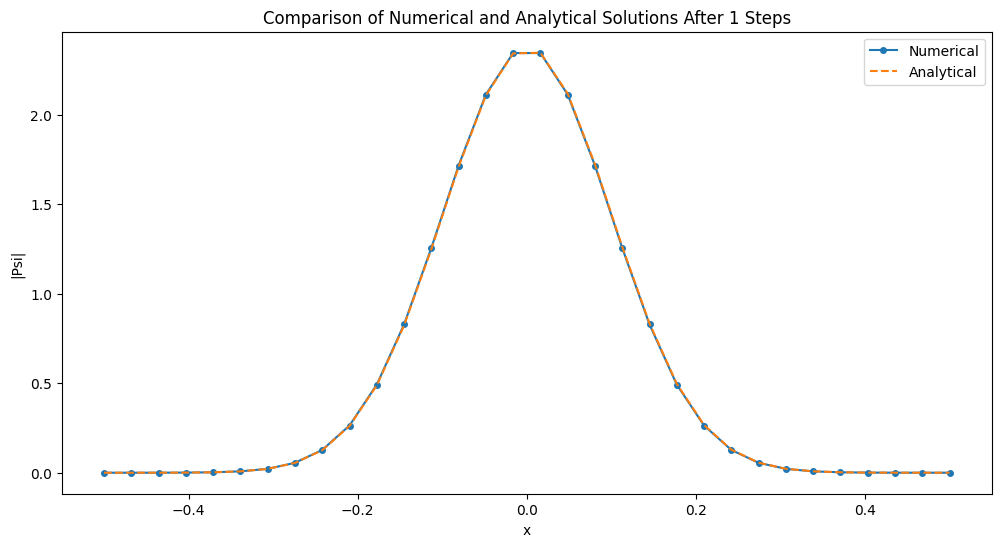

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def analytical_solution(x, t, x0, sigma0, k0, m, hbar):
    """Calculate the analytical Gaussian wave packet solution at time t."""
    sigma_t = sigma0 * np.sqrt(1 + (1j * hbar * t) / (2 * m * sigma0**2))
    Psi = (1 / np.sqrt(sigma_t * np.sqrt(np.pi))) * np.exp(-0.5 * ((x - x0 - (hbar * k0 / m) * t) / sigma_t) ** 2 + 1j * k0 * x)
    return Psi

# Constants and initial conditions
x0, sigma0, k0, m, hbar = 0.0, 0.1, 5.0, 1.0, 1.0
N, ghost_points, steps = 32, 8, 1
x_full = np.linspace(-0.5, 0.5, N)  # Full domain including ghost boundaries
x = x_full[ghost_points:-ghost_points]  # Primary domain

# Initial wave function
Psi0 = analytical_solution(x_full, 0, x0, sigma0, k0, m, hbar)

# Assuming evolution_matrix is provided
# Placeholder for the evolution matrix; replace with the actual evolution_matrix
evolution_matrix = np.array(GramFE_ComputeTimeEvolutionMatrix(dt = 1e-4, dh = x_full[1]-x_full[0], Eta = 1).tolist(), dtype=complex).reshape(16, 32)
dt = 1e-4

# Evolve the wave function
Psi_numerical = Psi0
for step in range(steps):
    t = dt * (step + 1)
    
    # Apply the evolution matrix to the inner domain
    Psi_inner = evolution_matrix @ Psi_numerical
    
    # Update the ghost boundaries with the analytical solution at time t
    Psi_ghost_left = analytical_solution(x_full[:ghost_points], t, x0, sigma0, k0, m, hbar)
    Psi_ghost_right = analytical_solution(x_full[-ghost_points:], t, x0, sigma0, k0, m, hbar)
    
    # Combine the inner domain with updated ghost boundaries
    Psi_numerical = np.concatenate((Psi_ghost_left, Psi_inner, Psi_ghost_right))

# Analytical solution for comparison
Psi_analytical = analytical_solution(x_full, dt * steps, x0, sigma0, k0, m, hbar)

# Plotting the comparison
plt.figure(figsize=(12, 6))
plt.plot(x_full, np.abs(Psi_numerical), label='Numerical', linestyle='-', marker='o', markersize=4)
plt.plot(x_full, np.abs(Psi_analytical), label='Analytical', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('|Psi|')
plt.legend()
plt.title('Comparison of Numerical and Analytical Solutions After {} Steps'.format(steps))
plt.show()


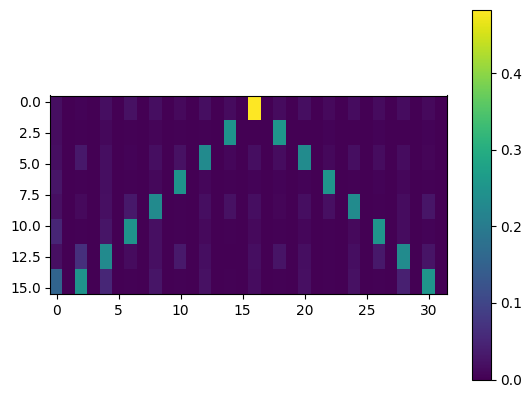

In [38]:
import numpy as np 
evolution_matrix_numpy = np.array(evolution_matrix.tolist(), dtype=complex).reshape((PS2, FLU_NXT)) 
plt.imshow(abs(evolution_matrix_numpy))
plt.colorbar()

/tmp/ipykernel_69206/1650034652.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(singular_values, use_line_collection=True)


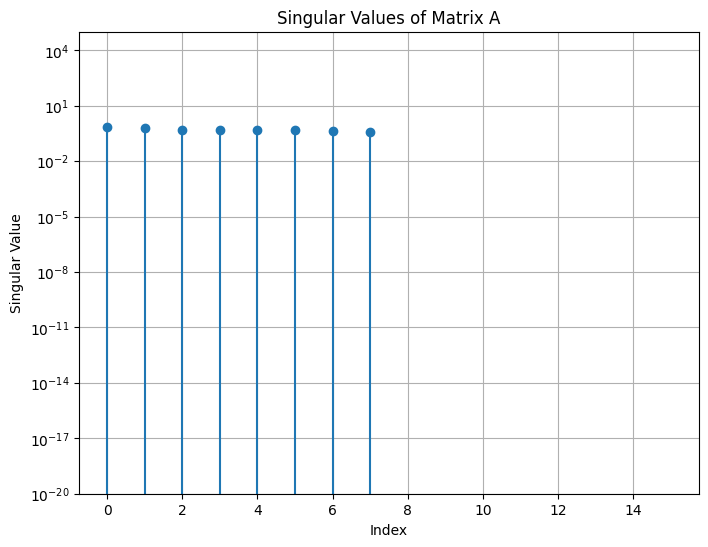

In [40]:
import matplotlib.pyplot as plt 

# Compute the singular values
U, S, V = mp.svd(evolution_matrix)



# Convert singular values to a list of floats for plotting

singular_values = [float(s) for s in S]



# Plot the singular values

plt.figure(figsize=(8, 6))

plt.stem(singular_values, use_line_collection=True)
plt.yscale("log")
plt.title('Singular Values of Matrix A')
plt.ylim(1e-20, 1e5)
plt.xlabel('Index')

plt.ylabel('Singular Value')

plt.grid(True)

plt.show()